# Search: Solving a Maze Using a Goal-based Agent

Student Name: Michael Doherty

I have used the following AI tools: ChatGPT (for general questions about Python)

I understand that my submission needs to be my own work: MD

## Instructions

Total Points: Undergrads 100 / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a PDF file.


## Introduction

The agent has a map of the maze it is in and the environment is assumed to be **deterministic, discrete, and known.** The agent must use the map to plan a path through the maze from the starting location $S$ to the goal location $G$.  This is a planing exercise for a goal-based agent, so you do not need to implement an environment, just use the map to search for a path. Once the plan is made, the agent in a deterministic environment (i.e., the transition function is deterministic with the outcome of each state/action pair fixed and no randomness) can just follow the path and does not need to care about the percepts.
This is also called an **[open-loop system](https://en.wikipedia.org/wiki/Open-loop_controller).**
The execution phase is trivial and we do not implement it in this exercise.

Tree search algorithm implementations that you find online and used in general algorithms courses often have a different aim. These algorithms assume that you already have a tree in memory. We are interested in dynamically creating a search tree with the aim of finding a good/the best path from the root node to the goal state. Follow the pseudo code presented in the text book (and replicated in the slides) closely. Ideally, we would like to search only a small part of the maze, i.e., create a search tree with as few nodes as possible.

Several mazes for this exercise are stored as text files. Here is the small example maze:

In [1]:
with open("small_maze.txt", "r") as f:
    maze_str = f.read()
print(maze_str)

XXXXXXXXXXXXXXXXXXXXXX
X XX        X X      X
X    XXXXXX X XXXXXX X
XXXXXX     S  X      X
X    X XXXXXX XX XXXXX
X XXXX X         X   X
X        XXX XXX   X X
XXXXXXXXXX    XXXXXX X
XG         XX        X
XXXXXXXXXXXXXXXXXXXXXX



__Note:__ The mazes above contains cycles and therefore the state space may not form proper trees unless cycles are prevented. Therfore, you will need to deal with cycle detection in your code.

## Parsing and pretty printing the maze

The maze can also be displayed in color using code in the module [maze_helper.py](maze_helper.py). The code parses the string representing the maze and converts it into a `numpy` 2d array which you can use in your implementation. Position are represented as a 2-tuple of the form `(row, col)`.

In [2]:
import maze_helper as mh

maze = mh.parse_maze(maze_str)

# look at a position in the maze by subsetting the 2d array
print("Position(0,0):", maze[0, 0])

# there is also a helper function called `look(maze, pos)` available
# which uses a 2-tuple for the position.
print("Position(8,1):", mh.look(maze, (8, 1)))

Position(0,0): X
Position(8,1): G


A helper function to visualize the maze is also available.

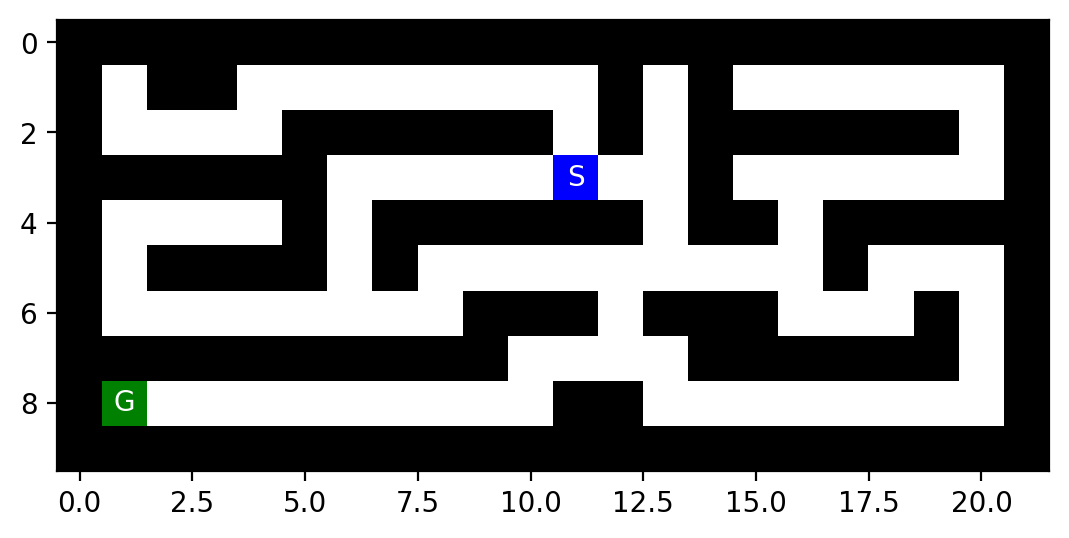

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# use higher resolution images in notebook

mh.show_maze(maze)

Find the position of the start and the goal using the helper function `find_pos()`

In [4]:
print("Start location:", mh.find_pos(maze, what = "S"))
print("Goal location:", mh.find_pos(maze, what = "G"))

Start location: (3, 11)
Goal location: (8, 1)


Helper function documentation.

In [5]:
help(mh)

Help on module maze_helper:

NAME
    maze_helper

DESCRIPTION
    Code for the Maze Assignment by Michael Hahsler
    Usage: 
        import maze_helper as mh
        mh.show_some_mazes()

FUNCTIONS
    find_pos(maze, what='S')
        Find start/goal in a maze and returns the first one. 
        Caution: there is no error checking!
        
        Parameters:
        maze: a array with characters prodced by parse_maze()
        what: the letter to be found ('S' for start and 'G' for goal)
        
        Returns:
        a tupple (x, y) for the found position.
    
    look(maze, pos)
        Look at the label of a square with the position as an array of the form (x, y).
    
    parse_maze(maze_str)
        Convert a maze as a string into a 2d numpy array
    
    show_maze(maze, fontsize=10)
        Display a (parsed) maze as an image.
    
    welcome()
        Welcome message.

FILE
    c:\users\mikec_g1kgiu8\onedrive\desktop\fall 2023 projects\artificialintelligence\assignment

## Tree structure

Here is an implementation of the basic node structure for the search algorithms (see Fig 3.7 on page 73). I have added a method that extracts the path from the root node to the current node. It can be used to get the path when the search is completed.

In [6]:
class Node:
    def __init__(self, pos, parent, action, cost):
        self.pos = tuple(pos)    # the state; positions are (row,col)
        self.parent = parent     # reference to parent node. None means root node.
        self.action = action     # action used in the transition function (root node has None)
        self.cost = cost         # for uniform cost this is the depth. It is also g(n) for A* search

    def __str__(self):
        return f"Node - pos = {self.pos}; action = {self.action}; cost = {self.cost}"

    def get_path_from_root(self):
        """returns nodes on the path from the root to the current node."""
        node = self
        path = [node]

        while not node.parent is None:
            node = node.parent
            path.append(node)

        path.reverse()

        return(path)

If needed, then you can add more fields to the class like the heuristic value $h(n)$ or $f(n)$.

Examples for how to create and use a tree and information on memory management can be found [here](../HOWTOs/trees.ipynb).

# Tasks

The goal is to:

1. Implement the following search algorithms for solving different mazes:

    - Breadth-first search (BFS)
    - Depth-first search (DFS)
    - Greedy best-first search (GBFS)
    - A* search

2. Run each of the above algorithms on the
    - [small maze](small_maze.txt),
    - [medium maze](medium_maze.txt),
    - [large maze](large_maze.txt),
    - [open maze](open_maze.txt),
    - [wall maze](wall_maze.txt),
    - [loops maze](loops_maze.txt),
    - [empty maze](empty_maze.txt), and
    - [empty 2_maze](empty_2_maze.txt).
    
3. For each problem instance and each search algorithm, report the following in a table:

    - The solution and its path cost
    - Total number of nodes expanded
    - Maximum tree depth
    - Maximum size of the frontier

4. Display each solution by marking every maze square (or state) visited and the squares on the final path.

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formated professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.

## Task 1: Defining the search problem and determining the problem size [10 Points]

Define the components of the search problem:

* Initial state
* Actions
* Transition model
* Goal state
* Path cost

Use verbal descriptions, variables and equations as appropriate.

*Note:* You can swich the next block from code to Markdown and use formating.

Our search problem is a Goal-Based Agent solving a given maze. Thus, the components of this search problem can be broken down:
- **Initial state**: The starting tile ('S'), where the agent begins its search.
- **Actions**: Travel north, east, south, or west 1 position to another open, unvisited tile (i.e., a tile that isn't a wall and hasn't already been visited).
- **Transition model**: If you go from tile A to tile B, you end up in tile B (regardless of which direction tile B is in).
- **Goal state**: When the agent reaches the goal tile ('G').
- **Path cost**: The number of tiles traveled over to reach the goal state.

Give some estimates for the problem size:

* $n$: state space size
* $d$: depth of the optimal solution
* $m$: maximum depth of tree
* $b$: maximum branching factor

Describe how you would determine these values for a given maze.

We can determine the estimates for the problem size of a given maze as follows:
- State Space Size **<i>n</i>**: The state space size is equal to the number of tiles in the maze that the agent can be on; thus, if there are 50 open tiles (any tile that isn't a wall, including the start and goal tile), then the state space size is 50.
- Depth of the Optimal Solution **<i>d</i>**: The depth of the optimal solution is simply the shortest path from the start tile to the goal tile. For example, if the shortest path from the start to the goal was 10 tiles, then the depth of the optimal solution is 10.
- Maximum Depth of Tree **<i>m</i>**: The maximum depth of the tree would occur when the search agent visits every open tile before reaching the goal tile; thus, the maximum depth of the tree is equal to the number of open tiles in the maze (any tile that isn't a wall).
- Maximum Branching Factor **<i>b</i>**: The maximum branching factor for the search tree is equal to the maximum number of successor nodes that can come from a parent. In our case, this is the maximum number of actions an agent can make from a given tile, which is 4 (north, east, south, or west).

## Task 2: Uninformed search: Breadth-first and depth-first [40 Points]

Implement these search strategies. Follow the pseudocode in the textbook/slides. You can use the tree structure shown above to extract the final path from your solution.

__Notes:__
* You can find maze solving implementations online that use the map to store information. While this is an effective idea for this two-dimensional navigation problem, it typically cannot be used for other search problems. Therefore, follow the textbook and only store information in the tree created during search, and use the `reached` and `frontier` data structures.
* DFS can be implemented using the BFS tree search algorithm and simply changing the order in which the frontier is expanded (this is equivalent to best-first search with path length as the criterion to expand the next node). However, to take advantage of the significantly smaller memory footprint of DFS, you need to implement DFS in a different way without a `reached` data structure and by releasing the memory for nodes that are not needed anymore.
* If DFS does not use a `reached` data structure, then its cycle checking abilities are limited. Remember, that DFS is incomplete if cycles cannot be prevented. You will see in your experiments that open spaces are a problem.

In [7]:
# Helper Functions

# draws the path found for a given maze
def draw_final_path(maze, goal):    
    for node in goal.get_path_from_root():
        if maze[node.pos] != 'S' and maze[node.pos] != 'G':
            maze[node.pos] = 'P'
            
# determines if a given child is already in the current node's path
# (used for DFS cycle checking)
def cycle_not_found(current, child_pos):
    for node in current.get_path_from_root():
        if child_pos == node.pos:
            return False
    
    return True

In [9]:
# Breadth First Search Implementation
def BFS(maze, verbose=False):
    start = mh.find_pos(maze, what="S")
    goal = mh.find_pos(maze, what="G")
    
    node = Node(start, None, None, 0) # starting node
    
    if node.pos == goal: # if starting node is also goal node
        return node
    
    frontier = [node] # a FIFO queue
    reached = [node.pos]
    
    while len(frontier) > 0:
        node = frontier.pop(0)
        
        if maze[node.pos] != 'S':
            maze[node.pos] = 'P'
                    
        row, col = node.pos
        
        if row - 1 > 0: # if north is inside of maze
            north = (row - 1, col)

            north_node = Node(north, node, 'North', node.cost + 1)

            if maze[north] == 'G': # if north child is goal
                if verbose:
                    mh.show_maze(maze)
                    draw_final_path(maze, north_node)
                    mh.show_maze(maze)
                
                return north_node
            elif maze[north] != 'X' and north not in reached:
                reached.append(north)
                frontier.append(north_node)
                maze[north] = 'F'
            
        if col + 1 < len(maze[0]): # if east is inside of maze
            east = (row, col + 1)
            
            east_node = Node(east, node, 'East', node.cost + 1)

            if maze[east] == 'G': # if east child is goal
                if verbose:
                    mh.show_maze(maze)
                    draw_final_path(maze, east_node)
                    mh.show_maze(maze)
                
                return east_node
            elif maze[east] != 'X' and east not in reached:
                reached.append(east)
                frontier.append(east_node)
                maze[east] = 'F'
            
        if row + 1 < len(maze[0]): # if south is inside of maze
            south = (row + 1, col)
            
            south_node = Node(south, node, 'South', node.cost + 1)
            
            if maze[south] == 'G': # if south child is goal
                if verbose:
                    mh.show_maze(maze)
                    draw_final_path(maze, south_node)
                    mh.show_maze(maze)
                
                return south_node
            elif maze[south] != 'X' and south not in reached:
                reached.append(south)
                frontier.append(south_node)
                maze[south] = 'F'
                        
        if col - 1 > 0: # if west is inside of maze
            west = (row, col - 1)
            
            west_node = Node(west, node, 'West', node.cost + 1)
            
            if maze[west] == 'G': # if west child is goal
                if verbose:
                    mh.show_maze(maze)
                    draw_final_path(maze, west_node)
                    mh.show_maze(maze)
                
                return west_node
            elif maze[west] != 'X' and west not in reached:
                reached.append(west)
                frontier.append(west_node)
                maze[west] = 'F'
          
        if verbose:
            mh.show_maze(maze)
        
        if maze[node.pos] != 'S':
            maze[node.pos] = '.'
        
                
    return None

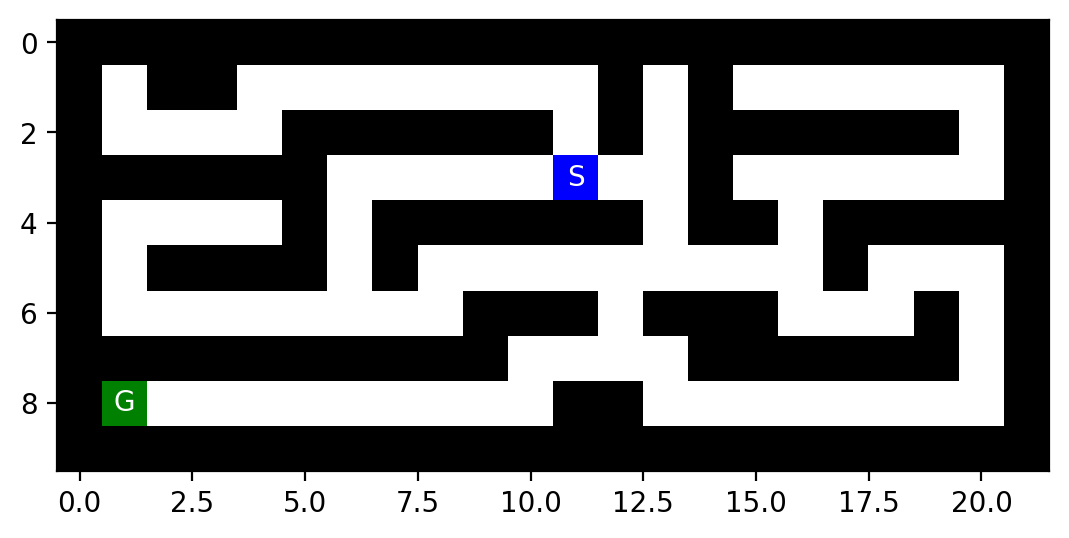

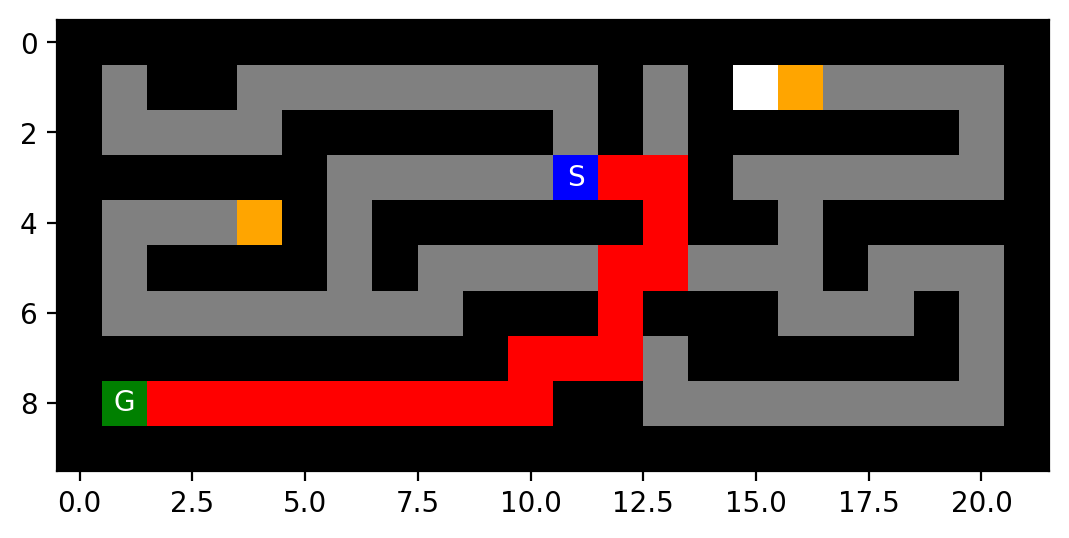

Path:
Node - pos = (3, 11); action = None; cost = 0
Node - pos = (3, 12); action = East; cost = 1
Node - pos = (3, 13); action = East; cost = 2
Node - pos = (4, 13); action = South; cost = 3
Node - pos = (5, 13); action = South; cost = 4
Node - pos = (5, 12); action = West; cost = 5
Node - pos = (6, 12); action = South; cost = 6
Node - pos = (7, 12); action = South; cost = 7
Node - pos = (7, 11); action = West; cost = 8
Node - pos = (7, 10); action = West; cost = 9
Node - pos = (8, 10); action = South; cost = 10
Node - pos = (8, 9); action = West; cost = 11
Node - pos = (8, 8); action = West; cost = 12
Node - pos = (8, 7); action = West; cost = 13
Node - pos = (8, 6); action = West; cost = 14
Node - pos = (8, 5); action = West; cost = 15
Node - pos = (8, 4); action = West; cost = 16
Node - pos = (8, 3); action = West; cost = 17
Node - pos = (8, 2); action = West; cost = 18
Node - pos = (8, 1); action = West; cost = 19


In [10]:
with open("small_maze.txt", "r") as f:
    maze_str = f.read()

maze = mh.parse_maze(maze_str)

mh.show_maze(maze)

goal = BFS(maze)

draw_final_path(maze, goal)
mh.show_maze(maze)

print('Path:')
for node in goal.get_path_from_root():
    print(node)

In [11]:
import random

# Depth First Search Implementation
'''
the depth variable is only used for Iterative Deepening Search,
otherwise it is defaulted to infinity
'''
def DFS(maze, depth=float('inf'), verbose=False):
    start = mh.find_pos(maze, what="S")
    goal = mh.find_pos(maze, what="G")
    
    node = Node(start, None, None, 0) # starting node
        
    frontier = [node] # a LIFO stack
    
    counter = 0
    
    # counter and depth are only relevant when Iterative Deepening Search defines a depth
    while len(frontier) > 0 and counter < depth:
        counter += 1
        
        node = frontier.pop(-1) # takes the top node off the stack
        
        if maze[node.pos] == 'G': # if the current node is the goal
            if verbose:
                draw_final_path(maze, node)
                mh.show_maze(maze)
                
            return node
        
        if maze[node.pos] != 'S':
            maze[node.pos] = 'P'

        row, col = node.pos
        
        # the possible actions (north, south, east, west) that can be navigated to from the current tile
        possible_actions = []

        if row - 1 > 0: # if north is inside of maze
            north = (row - 1, col)
            
            # if north isn't a wall and isn't already in the path
            if maze[north] != 'X' and cycle_not_found(node, north):
                # remove any earlier instances of north on the frontier 
                frontier = [node for node in frontier if node.pos != north]
                
                north_node = Node(north, node, 'North', node.cost + 1)
                possible_actions.append(north_node)
                if maze[north] != 'G':
                    maze[north] = 'F'

        if col + 1 < len(maze[0]): # if east is inside of maze
            east = (row, col + 1)
            
            # if east isn't a wall and isn't already in the path
            if maze[east] != 'X' and cycle_not_found(node, east):
                # remove any earlier instances of east on the frontier
                frontier = [node for node in frontier if node.pos != east]
                
                east_node = Node(east, node, 'East', node.cost + 1)
                possible_actions.append(east_node)
                if maze[east] != 'G':
                    maze[east] = 'F'

        if row + 1 < len(maze[0]): # if south is inside of maze
            south = (row + 1, col)
            
            # if south isn't a wall and isn't already in the path
            if maze[south] != 'X' and cycle_not_found(node, south):
                # remove any earlier instances of south on the frontier
                frontier = [node for node in frontier if node.pos != south]
                
                south_node = Node(south, node, 'South', node.cost + 1)
                possible_actions.append(south_node)
                if maze[south] != 'G':
                    maze[south] = 'F'

        if col - 1 > 0: # if west is inside of maze
            west = (row, col - 1)
            
            # if west isn't a wall and isn't already in the path
            if maze[west] != 'X' and cycle_not_found(node, west):
                # remove any earlier instances of west on the frontier
                frontier = [node for node in frontier if node.pos != west]
                
                west_node = Node(west, node, 'West', node.cost + 1)
                possible_actions.append(west_node)
                if maze[west] != 'G':
                    maze[west] = 'F'

        # add the possible actions to the frontier in a random order
        random.shuffle(possible_actions)
        frontier.extend(possible_actions)
                    
        if verbose:
            mh.show_maze(maze)
        
        if maze[node.pos] != 'S':
            maze[node.pos] = '.'
            
    if counter == depth: # if the depth limit is reached
        return depth
    else: # if there is no solution
        return None


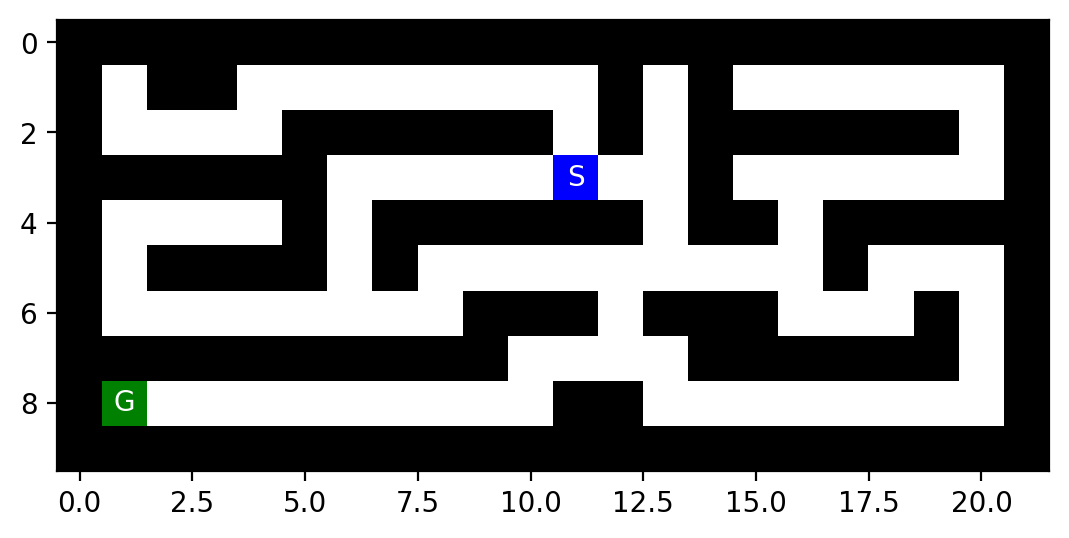

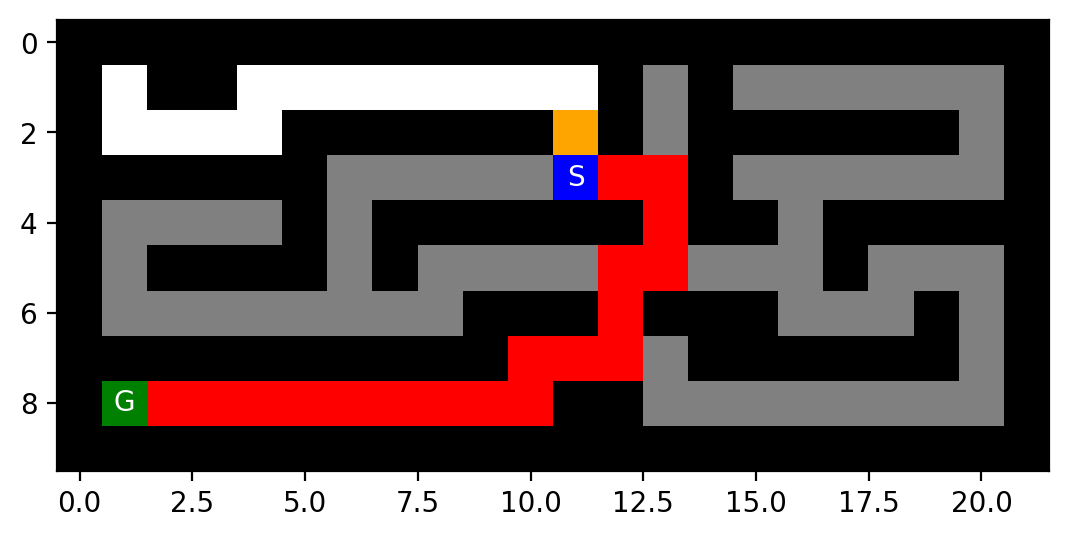

Path:
Node - pos = (3, 11); action = None; cost = 0
Node - pos = (3, 12); action = East; cost = 1
Node - pos = (3, 13); action = East; cost = 2
Node - pos = (4, 13); action = South; cost = 3
Node - pos = (5, 13); action = South; cost = 4
Node - pos = (5, 12); action = West; cost = 5
Node - pos = (6, 12); action = South; cost = 6
Node - pos = (7, 12); action = South; cost = 7
Node - pos = (7, 11); action = West; cost = 8
Node - pos = (7, 10); action = West; cost = 9
Node - pos = (8, 10); action = South; cost = 10
Node - pos = (8, 9); action = West; cost = 11
Node - pos = (8, 8); action = West; cost = 12
Node - pos = (8, 7); action = West; cost = 13
Node - pos = (8, 6); action = West; cost = 14
Node - pos = (8, 5); action = West; cost = 15
Node - pos = (8, 4); action = West; cost = 16
Node - pos = (8, 3); action = West; cost = 17
Node - pos = (8, 2); action = West; cost = 18
Node - pos = (8, 1); action = West; cost = 19


In [12]:
with open("small_maze.txt", "r") as f:
    maze_str = f.read()

maze = mh.parse_maze(maze_str)

mh.show_maze(maze)

goal = DFS(maze)

draw_final_path(maze, goal)
mh.show_maze(maze)

print('Path:')
for node in goal.get_path_from_root():
    print(node)

How does BFS and DFS deal with loops (cycles)?

Breadth First Search and Depth First Search deal with loops in different ways:
- **BFS:** Breadth First Search has a <code>reached</code> data structure that keeps track of all of the nodes it has already visited. Before adding a node to the frontier, BFS checks to see if the node is in <code>reached</code>. If it is, then it won't add it to the frontier; using this method, it won't visit any node more than once, preventing the possibility of infinite loops or cycles occuring.
- **DFS:** Depth First Search has a cycle checking method that ensures that an infinite loop won't occur. Before adding a node to the frontier, DFS checks to see if the node is already part of its path (the nodes it has currently traversed over). If it is, then it won't add the node to the frontier. DFS also makes sure that a node is not present in the frontier multiple times (if it is, then it removes the earlier entries). By utilizing both of these processes (cycle checking and removing duplicates in the frontier), DFS ensures that a node is not visited more than once, preventing infinite loops and cycles from occuring.

Are your implementations complete and optimal? Explain why. What is the time and space complexity of each of **your** implementations?

My implementation for **Breadth First Search** is both complete and optimal, as it will find a solution if there is one (making it complete), and since the cost is the same for every action, it will find the shortest path to the goal (making it optimal).

My implementation for **Depth First Search** is complete (for finite spaces), but not optimal. Since the mazes we are solving with DFS are finite, DFS will find a solution (making it complete for finite spaces). However, DFS returns the first solution it finds; this makes it not optimal, as it won't necessarily find the shortest path to the goal.

The time complexities of my implementations are:
- **BFS**: <i>O(n)</i>, where <i>n</i> is the number of open nodes/tiles that the agent can visit (as the worst case scenario is that all open tiles are visited before the goal node is reached).
- **DFS**: <i>O(n)</i>, where <i>n</i> is the number of open nodes/tiles that the agent can visit (as the worst case scenario is that all open tiles are visited only once before the goal node is reached).

The space complexities of my implementations are:
- **BFS**: <i>O(n)</i>, where <i>n</i> is the number of open nodes/tiles that the agent can visit (as the worst case scenario is that all open tiles are added to <code>reached</code> before the goal node is reached).
- **DFS**: <i>O(d)</i>, where <i>d</i> is the depth of the path it finds from the start node to the goal node; since there is no <code>reached</code> data structure, only the nodes in the current path are stored in memory, which shrinks the space complexity for DFS to <i>O(d)</i>.

## Task 3: Informed search: Implement greedy best-first search and A* search  [20 Points]

You can use the map to estimate the distance from your current position to the goal using the Manhattan distance (see https://en.wikipedia.org/wiki/Taxicab_geometry) as a heuristic function. Both algorithms are based on Best-First search which requires only a small change from the BFS algorithm you have already implemented (see textbook/slides).

In [13]:
# Helper Functions

# finds the manhattan distance between two given positions in a maze
def get_manhattan_distance(pos1, pos2):
    row_diff = pos1[0] - pos2[0]
    col_diff = pos1[1] - pos2[1]
    
    return abs(row_diff) + abs(col_diff)

In [14]:
import bisect

# Greedy Best First Search Implementation
'''
the cost for each node is equal to the manhattan distance
from the node to the goal

bisect.insort() is used to make the frontier a priority queue,
as it inserts elements in sorted order by shortest manhattan distance
'''
def greedy_BFS(maze, verbose=False):
    start = mh.find_pos(maze, what="S")
    goal = mh.find_pos(maze, what="G")
    
    # start node
    node = Node(start, None, None, get_manhattan_distance(start, goal))
    
    if node.pos == goal:
        return node
    
    frontier = [node] # priority queue
    reached = {node.pos: node} # lookup table
    
    while len(frontier) > 0:
        node = frontier.pop(0)
        
        if maze[node.pos] != 'S':
            maze[node.pos] = 'P'
                    
        row, col = node.pos
        
        if row - 1 > 0: # if north is inside of maze
            north = (row - 1, col)

            north_node = Node(north, node, 'North', get_manhattan_distance(north, goal))

            if maze[north] == 'G': # if north child is goal
                if verbose:
                    mh.show_maze(maze)
                    draw_final_path(maze, north_node)
                    mh.show_maze(maze)
                
                return north_node
            elif maze[north] != 'X' and north not in reached:
                bisect.insort(frontier, north_node, key=lambda node: node.cost)
                reached[north] = north_node
                maze[north] = 'F'
            
        if col + 1 < len(maze[0]): # if east is inside of maze
            east = (row, col + 1)
            
            east_node = Node(east, node, 'East', get_manhattan_distance(east, goal))

            if maze[east] == 'G': # if east child is goal
                if verbose:
                    mh.show_maze(maze)
                    draw_final_path(maze, east_node)
                    mh.show_maze(maze)
                
                return east_node
            elif maze[east] != 'X' and east not in reached:
                bisect.insort(frontier, east_node, key=lambda node: node.cost)
                reached[east] = east_node
                maze[east] = 'F'
            
        if row + 1 < len(maze[0]): # if south is inside of maze
            south = (row + 1, col)
            
            south_node = Node(south, node, 'South', get_manhattan_distance(south, goal))
            
            if maze[south] == 'G': # if south child is goal
                if verbose:
                    mh.show_maze(maze)
                    draw_final_path(maze, south_node)
                    mh.show_maze(maze)
                
                return south_node
            elif maze[south] != 'X' and south not in reached:
                bisect.insort(frontier, south_node, key=lambda node: node.cost)
                reached[south] = south_node
                maze[south] = 'F'
                        
        if col - 1 > 0: # if west is inside of maze
            west = (row, col - 1)
            
            west_node = Node(west, node, 'West', get_manhattan_distance(west, goal))
            
            if maze[west] == 'G': # if west child is goal
                if verbose:
                    mh.show_maze(maze)
                    draw_final_path(maze, west_node)
                    mh.show_maze(maze)
                
                return west_node
            elif maze[west] != 'X' and west not in reached:
                bisect.insort(frontier, west_node, key=lambda node: node.cost)
                reached[west] = west_node
                maze[west] = 'F'
          
        if verbose:
            mh.show_maze(maze)
        
        if maze[node.pos] != 'S':
            maze[node.pos] = '.'
        
                
    return None

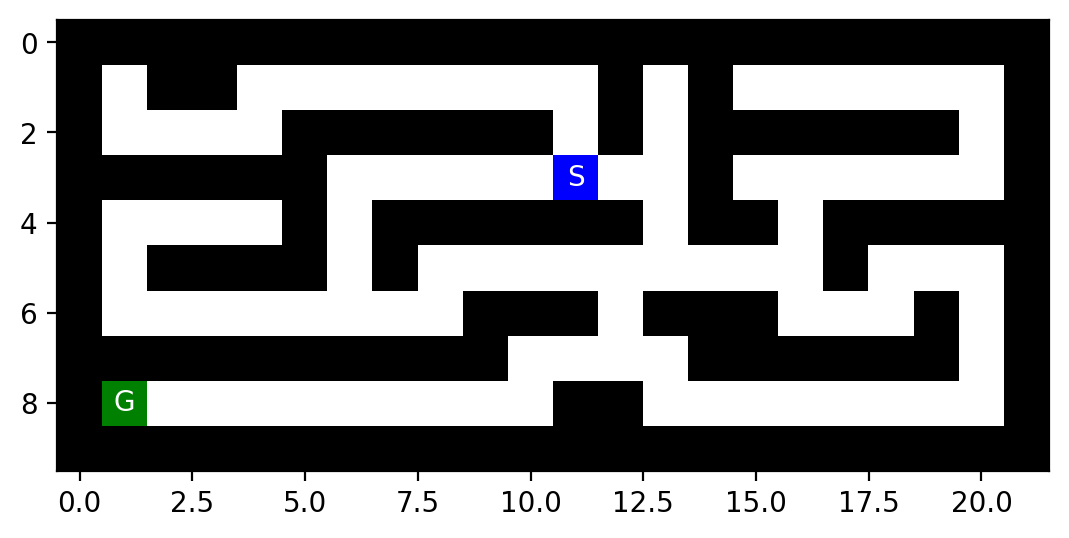

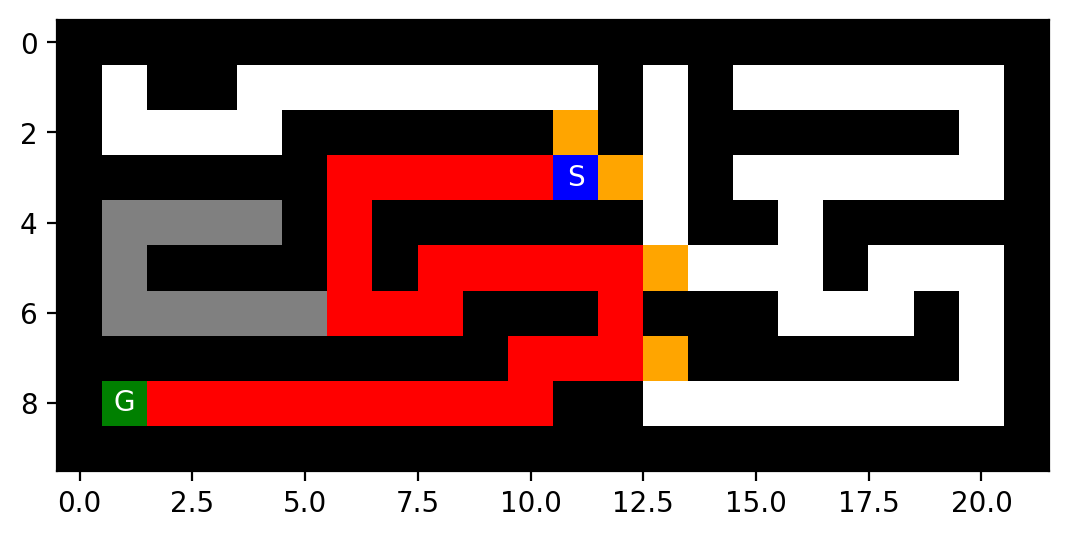

Path:
Node - pos = (3, 11); action = None; cost = 15
Node - pos = (3, 10); action = West; cost = 14
Node - pos = (3, 9); action = West; cost = 13
Node - pos = (3, 8); action = West; cost = 12
Node - pos = (3, 7); action = West; cost = 11
Node - pos = (3, 6); action = West; cost = 10
Node - pos = (4, 6); action = South; cost = 9
Node - pos = (5, 6); action = South; cost = 8
Node - pos = (6, 6); action = South; cost = 7
Node - pos = (6, 7); action = East; cost = 8
Node - pos = (6, 8); action = East; cost = 9
Node - pos = (5, 8); action = North; cost = 10
Node - pos = (5, 9); action = East; cost = 11
Node - pos = (5, 10); action = East; cost = 12
Node - pos = (5, 11); action = East; cost = 13
Node - pos = (5, 12); action = East; cost = 14
Node - pos = (6, 12); action = South; cost = 13
Node - pos = (7, 12); action = South; cost = 12
Node - pos = (7, 11); action = West; cost = 11
Node - pos = (7, 10); action = West; cost = 10
Node - pos = (8, 10); action = South; cost = 9
Node - pos = (8, 

In [15]:
with open("small_maze.txt", "r") as f:
    maze_str = f.read()

maze = mh.parse_maze(maze_str)

mh.show_maze(maze)

goal = greedy_BFS(maze)

draw_final_path(maze, goal)
mh.show_maze(maze)

print('Path:')
for node in goal.get_path_from_root():
    print(node)

In [16]:
# A Star Search Implementation
'''
the cost for each node is equal to the manhattan distance
from the node to the goal AND the path length from the node to the start

bisect.insort() is used to make the frontier a priority queue,
as it inserts elements in sorted order by cheapest cost
'''
def a_star_search(maze, verbose=False):
    start = mh.find_pos(maze, what="S")
    goal = mh.find_pos(maze, what="G")
    
    # start node
    node = Node(start, None, None, get_manhattan_distance(start, goal))
    
    if node.pos == goal:
        return node
    
    frontier = [node] # priority queue
    reached = {node.pos: node} # lookup table
    
    while len(frontier) > 0:
        node = frontier.pop(0)
        
        if maze[node.pos] != 'S':
            maze[node.pos] = 'P'
                    
        row, col = node.pos
        
        if row - 1 > 0: # if north is inside of maze
            north = (row - 1, col)

            north_node = Node(north, node, 'North', get_manhattan_distance(north, goal) + len(node.get_path_from_root()) + 1)

            if maze[north] == 'G':
                if verbose:
                    mh.show_maze(maze)
                    draw_final_path(maze, north_node)
                    mh.show_maze(maze)
                
                return north_node
            elif maze[north] != 'X' and (north not in reached or north_node.cost < reached[north].cost):
                bisect.insort(frontier, north_node, key=lambda node: node.cost)
                reached[north] = north_node
                maze[north] = 'F'
            
        if col + 1 < len(maze[0]): # if east is inside of maze
            east = (row, col + 1)
            
            east_node = Node(east, node, 'East', get_manhattan_distance(east, goal) + len(node.get_path_from_root()) + 1)

            if maze[east] == 'G':
                if verbose:
                    mh.show_maze(maze)
                    draw_final_path(maze, east_node)
                    mh.show_maze(maze)
                
                return east_node
            elif maze[east] != 'X' and (east not in reached or east_node.cost < reached[east].cost):
                bisect.insort(frontier, east_node, key=lambda node: node.cost)
                reached[east] = east_node
                maze[east] = 'F'
            
        if row + 1 < len(maze[0]): # if south is inside of maze
            south = (row + 1, col)
            
            south_node = Node(south, node, 'South', get_manhattan_distance(south, goal) + len(node.get_path_from_root()) + 1)
            
            if maze[south] == 'G':
                if verbose:
                    mh.show_maze(maze)
                    draw_final_path(maze, south_node)
                    mh.show_maze(maze)
                
                return south_node
            elif maze[south] != 'X' and (south not in reached or south_node.cost < reached[south].cost):
                bisect.insort(frontier, south_node, key=lambda node: node.cost)
                reached[south] = south_node
                maze[south] = 'F'
                        
        if col - 1 > 0: # if west is inside of maze
            west = (row, col - 1)
            
            west_node = Node(west, node, 'West', get_manhattan_distance(west, goal) + len(node.get_path_from_root()) + 1)
            
            if maze[west] == 'G':
                if verbose:
                    mh.show_maze(maze)
                    draw_final_path(maze, west_node)
                    mh.show_maze(maze)
                
                return west_node
            elif maze[west] != 'X' and (west not in reached or west_node.cost < reached[west].cost):
                bisect.insort(frontier, west_node, key=lambda node: node.cost)
                reached[west] = west_node
                maze[west] = 'F'
          
        if verbose:
            mh.show_maze(maze)
        
        if maze[node.pos] != 'S':
            maze[node.pos] = '.'
        
                
    return None

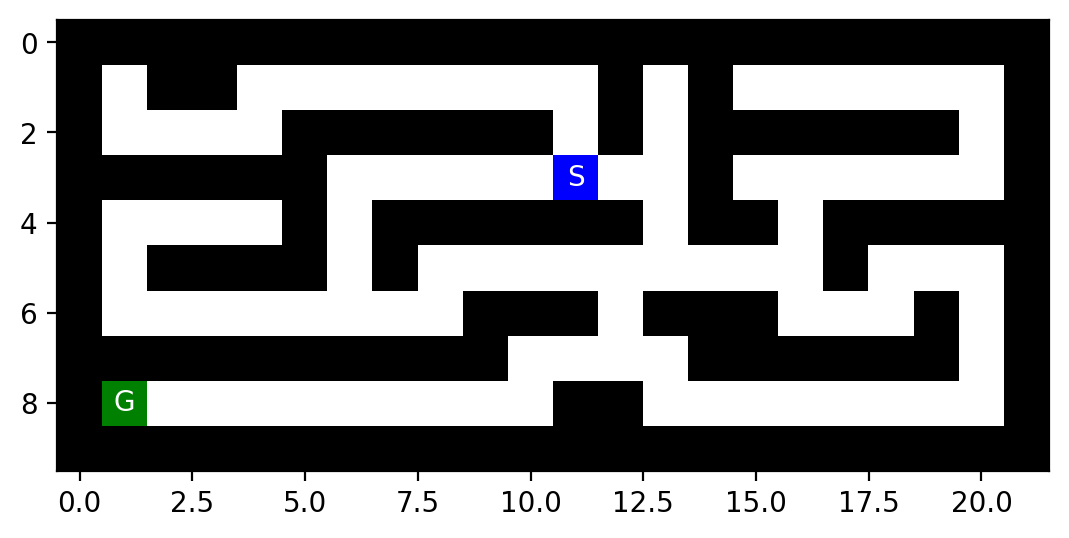

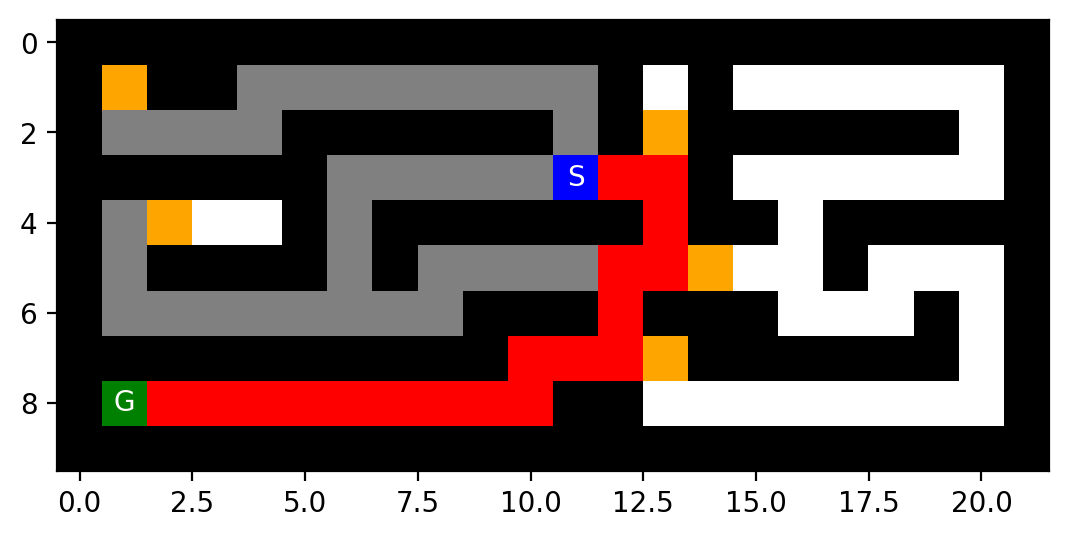

Path:
Node - pos = (3, 11); action = None; cost = 15
Node - pos = (3, 12); action = East; cost = 18
Node - pos = (3, 13); action = East; cost = 20
Node - pos = (4, 13); action = South; cost = 20
Node - pos = (5, 13); action = South; cost = 20
Node - pos = (5, 12); action = West; cost = 20
Node - pos = (6, 12); action = South; cost = 20
Node - pos = (7, 12); action = South; cost = 20
Node - pos = (7, 11); action = West; cost = 20
Node - pos = (7, 10); action = West; cost = 20
Node - pos = (8, 10); action = South; cost = 20
Node - pos = (8, 9); action = West; cost = 20
Node - pos = (8, 8); action = West; cost = 20
Node - pos = (8, 7); action = West; cost = 20
Node - pos = (8, 6); action = West; cost = 20
Node - pos = (8, 5); action = West; cost = 20
Node - pos = (8, 4); action = West; cost = 20
Node - pos = (8, 3); action = West; cost = 20
Node - pos = (8, 2); action = West; cost = 20
Node - pos = (8, 1); action = West; cost = 20


In [17]:
with open("small_maze.txt", "r") as f:
    maze_str = f.read()

maze = mh.parse_maze(maze_str)

mh.show_maze(maze)

goal = a_star_search(maze)

draw_final_path(maze, goal)
mh.show_maze(maze)

print('Path:')
for node in goal.get_path_from_root():
    print(node)

Are your implementations complete and optimal? What is the time and space complexity?

My implementation for **Greedy Best First Search** is complete, but not optimal, as it will find a solution if there is one (making it complete), but the path it finds is not necessarily the shortest path to the goal (making it not optimal).

My implementation for **A* Search** is both complete and optimal. A* Search will find a solution if one exists (making it complete), and using a combined cost evaluation of both a node's manhattan distance to the goal and the current path's length, it will always find the shortest path to the goal (making it optimal).

The time complexities of my implementations are:
- **Greedy BFS**: <i>O(n)</i>, where <i>n</i> is the number of open nodes/tiles that the agent visits (the worst case scenario is that all open tiles are visited before the goal node is reached, while best case scenario is that only the nodes on the found path are visited).
- <b>A* Search</b>: <i>O(n)</i>, where <i>n</i> is the number of open nodes/tiles that the agent visits (the worst case scenario is that all open tiles are visited before the goal node is reached, while best case scenario is that only the nodes on the shortest path are visited).

The space complexities of my implementations are:
- **Greedy BFS**: <i>O(n)</i>, where <i>n</i> is the number of open nodes/tiles that the agent visits (the worst case scenario is that all open tiles are added to <code>reached</code> before the goal node is reached, while best case scenario is that only the nodes on the found path are added to <code>reached</code>).
- <b>A* Search</b>: <i>O(n)</i>, where <i>n</i> is the number of open nodes/tiles that the agent visits (as the worst case scenario is that all open tiles are added to <code>reached</code> before the goal node is reached, while best case scenario is that only the nodes on the shortest path are added to <code>reached</code>).

## Task 4: Comparison and discussion [20 Points]

Run experiments to compare the implemented algorithms.

How to deal with issues:

* Your implementation returns unexpected results: Try to debug and fix the code. Visualizing the maze, the current path and the frontier after every step is very helpful. If the code still does not work, then mark the result with an asterisk (*) and describe the issue below the table.

* Your implementation cannot consistently solve a specific maze and ends up in an infinite loop:
    Debug. If it is a shortcoming of the algorithm/implementation, then put "N/A*" in the results table and describe why this is happening.

In [18]:
from copy import deepcopy
from IPython.display import display, Markdown

# calculates stats and outputs them in a markdown table
def get_stats(maze_name, title, return_data=False):
    with open(maze_name, "r") as f:
        maze_str = f.read()

    maze = mh.parse_maze(maze_str)

    breadth_stats = [0, 0, 0, 0, 0]
    depth_stats = [0, 0, 0, 0, 0]
    greedy_stats = [0, 0, 0, 0, 0]
    a_star_stats = [0, 0, 0, 0, 0]

    for i in range(10):
        goal, path_cost, num_nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = BFS_stats(deepcopy(maze))
        breadth_stats[0] += path_cost
        breadth_stats[1] += num_nodes_expanded
        breadth_stats[2] += max_tree_depth
        breadth_stats[3] += max_nodes_in_memory
        breadth_stats[4] += max_frontier_size

        goal, path_cost, num_nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = DFS_stats(deepcopy(maze))
        depth_stats[0] += path_cost
        depth_stats[1] += num_nodes_expanded
        depth_stats[2] += max_tree_depth
        depth_stats[3] += max_nodes_in_memory
        depth_stats[4] += max_frontier_size

        goal, path_cost, num_nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = greedy_BFS_stats(deepcopy(maze))
        greedy_stats[0] += path_cost
        greedy_stats[1] += num_nodes_expanded
        greedy_stats[2] += max_tree_depth
        greedy_stats[3] += max_nodes_in_memory
        greedy_stats[4] += max_frontier_size

        goal, path_cost, num_nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size = a_star_search_stats(deepcopy(maze))
        a_star_stats[0] += path_cost
        a_star_stats[1] += num_nodes_expanded
        a_star_stats[2] += max_tree_depth
        a_star_stats[3] += max_nodes_in_memory
        a_star_stats[4] += max_frontier_size
        
    breadth_stats = [num / 10 for num in breadth_stats]
    depth_stats = [num / 10 for num in depth_stats]
    greedy_stats = [num / 10 for num in greedy_stats]
    a_star_stats = [num / 10 for num in a_star_stats]
        
    markdown_table = f'''
__{title}__

| algorithm | path cost        | # of nodes expanded | max tree depth   | max # of nodes in memory | max frontier size |
|-----------|------------------|---------------------|------------------|--------------------------|-------------------|
| BFS       |{breadth_stats[0]}|{breadth_stats[1]}   |{breadth_stats[2]}|{breadth_stats[3]}        |{breadth_stats[4]} |
| DFS       |{depth_stats[0]}  |{depth_stats[1]}     |{depth_stats[2]}  |{depth_stats[3]}          |{depth_stats[4]}   |
| Greedy BFS|{greedy_stats[0]} |{greedy_stats[1]}    |{greedy_stats[2]} |{greedy_stats[3]}         |{greedy_stats[4]}  |
| A* Search |{a_star_stats[0]} |{a_star_stats[1]}    |{a_star_stats[2]} |{a_star_stats[3]}         |{a_star_stats[4]}  |
    '''    

    display(Markdown(markdown_table))
    
    if return_data:
        return breadth_stats, depth_stats, greedy_stats, a_star_stats

Complete the following table for each maze.

For the following tables, I ran each algorithm on the given maze 10 times to get an average. I also defined each of the properties as follows:
- **Path Cost**: The length of the found path (including the start and goal tiles); since there are no weights between nodes, the cost to move from one node/tile to another is always 1.
- **Number of Nodes Expanded**: The number of nodes that were explored (i.e., all nodes that are either red or gray on the resulting maze).
- **Max Tree Depth**: The length of the longest explored path (regardless of whether it resulted in reaching the goal node).
- **Max Number of Nodes in Memory**: For DFS, this is the length of the longest explored path. For the other search algorithms, this is the number of nodes that were explored or in the frontier (i.e., all nodes that are red, yellow, or gray on the resulting maze).
- **Max Frontier Size**: The maximum frontier size.

**NOTE**: The code I used to calculate the stats (BFS_stats, DFS_stats, etc.) is at the bottom of this Notebook. It's basically the same code as my initial implementation, except it also records and returns the stats needed for analysis.

In [20]:
# creates markdown table with stats for each maze
stats1 = get_stats("small_maze.txt", 'Small Maze', True)
stats2 = get_stats("medium_maze.txt", 'Medium Maze', True)
stats3 = get_stats("large_maze.txt", 'Large Maze', True)
stats4 = get_stats("open_maze.txt", 'Open Maze', True)
stats5 = get_stats("wall_maze.txt", 'Wall Maze', True)
stats6 = get_stats("loops_maze.txt", 'Loops Maze', True)
stats7 = get_stats("empty_maze.txt", 'Empty Maze', True)
stats8 = get_stats("empty_2_maze.txt", 'Empty 2 Maze', True)


__Small Maze__

| algorithm | path cost        | # of nodes expanded | max tree depth   | max # of nodes in memory | max frontier size |
|-----------|------------------|---------------------|------------------|--------------------------|-------------------|
| BFS       |20.0|90.0   |20.0|94.0        |9.0 |
| DFS       |35.6  |53.1     |40.1  |40.1          |6.4   |
| Greedy BFS|30.0 |39.0    |30.0 |47.0         |5.0  |
| A* Search |20.0 |53.0    |20.0 |64.0         |8.0  |
    


__Medium Maze__

| algorithm | path cost        | # of nodes expanded | max tree depth   | max # of nodes in memory | max frontier size |
|-----------|------------------|---------------------|------------------|--------------------------|-------------------|
| BFS       |69.0|267.0   |69.0|271.0        |9.0 |
| DFS       |138.2  |199.4     |168.7  |168.7          |10.0   |
| Greedy BFS|75.0 |78.0    |75.0 |84.0         |4.0  |
| A* Search |69.0 |222.0    |69.0 |233.0         |8.0  |
    


__Large Maze__

| algorithm | path cost        | # of nodes expanded | max tree depth   | max # of nodes in memory | max frontier size |
|-----------|------------------|---------------------|------------------|--------------------------|-------------------|
| BFS       |211.0|618.0   |211.0|624.0        |8.0 |
| DFS       |211.0  |449.7     |220.2  |220.2          |35.1   |
| Greedy BFS|211.0 |466.0    |211.0 |506.0         |21.0  |
| A* Search |211.0 |549.0    |211.0 |563.0         |12.0  |
    


__Open Maze__

| algorithm | path cost        | # of nodes expanded | max tree depth   | max # of nodes in memory | max frontier size |
|-----------|------------------|---------------------|------------------|--------------------------|-------------------|
| BFS       |55.0|679.0   |55.0|685.0        |25.0 |
| DFS       |201.8  |458.1     |236.1  |236.1          |89.6   |
| Greedy BFS|69.0 |89.0    |69.0 |219.0         |65.0  |
| A* Search |55.0 |534.0    |55.0 |574.0         |25.0  |
    


__Wall Maze__

| algorithm | path cost        | # of nodes expanded | max tree depth   | max # of nodes in memory | max frontier size |
|-----------|------------------|---------------------|------------------|--------------------------|-------------------|
| BFS       |15.0|85.0   |15.0|91.0        |11.0 |
| DFS       |44.4  |52.7     |47.2  |47.2          |20.5   |
| Greedy BFS|15.0 |14.0    |15.0 |68.0         |27.0  |
| A* Search |15.0 |55.0    |15.0 |115.0         |30.0  |
    


__Loops Maze__

| algorithm | path cost        | # of nodes expanded | max tree depth   | max # of nodes in memory | max frontier size |
|-----------|------------------|---------------------|------------------|--------------------------|-------------------|
| BFS       |24.0|70.0   |24.0|72.0        |8.0 |
| DFS       |40.0  |63.8     |41.8  |41.8          |9.3   |
| Greedy BFS|24.0 |51.0    |24.0 |69.0         |9.0  |
| A* Search |24.0 |58.0    |24.0 |65.0         |6.0  |
    


__Empty Maze__

| algorithm | path cost        | # of nodes expanded | max tree depth   | max # of nodes in memory | max frontier size |
|-----------|------------------|---------------------|------------------|--------------------------|-------------------|
| BFS       |15.0|92.0   |15.0|98.0        |12.0 |
| DFS       |44.2  |49.6     |44.6  |44.6          |24.7   |
| Greedy BFS|15.0 |14.0    |15.0 |68.0         |27.0  |
| A* Search |15.0 |62.0    |15.0 |122.0         |30.0  |
    


__Empty 2 Maze__

| algorithm | path cost        | # of nodes expanded | max tree depth   | max # of nodes in memory | max frontier size |
|-----------|------------------|---------------------|------------------|--------------------------|-------------------|
| BFS       |15.0|92.0   |15.0|98.0        |11.0 |
| DFS       |50.8  |58.2     |53.9  |53.9          |26.8   |
| Greedy BFS|15.0 |14.0    |15.0 |70.0         |27.0  |
| A* Search |15.0 |62.0    |15.0 |122.0         |30.0  |
    

Present the results using charts (see [Python Code Examples/charts and tables](../HOWTOs/charts_and_tables.ipynb)).

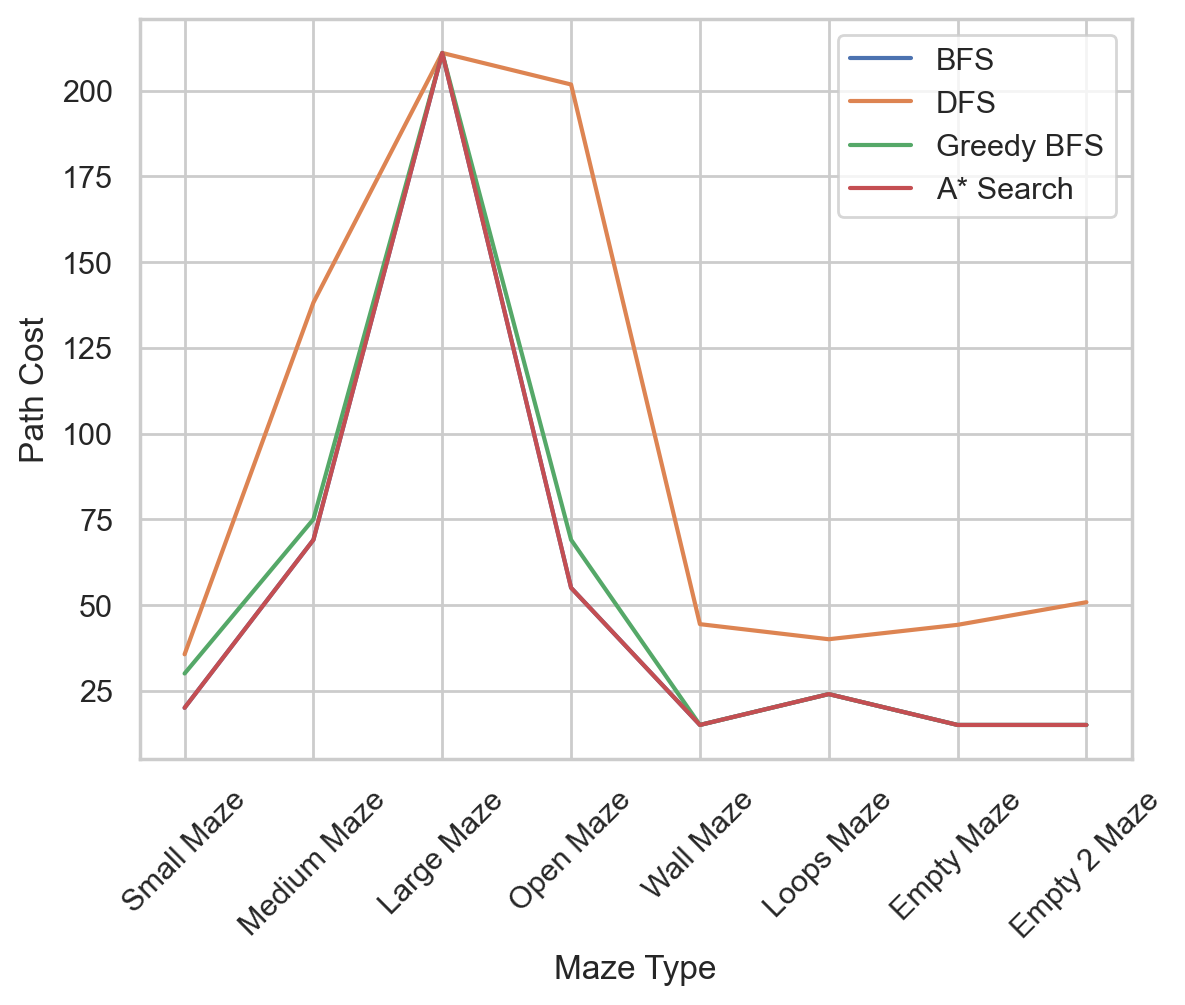

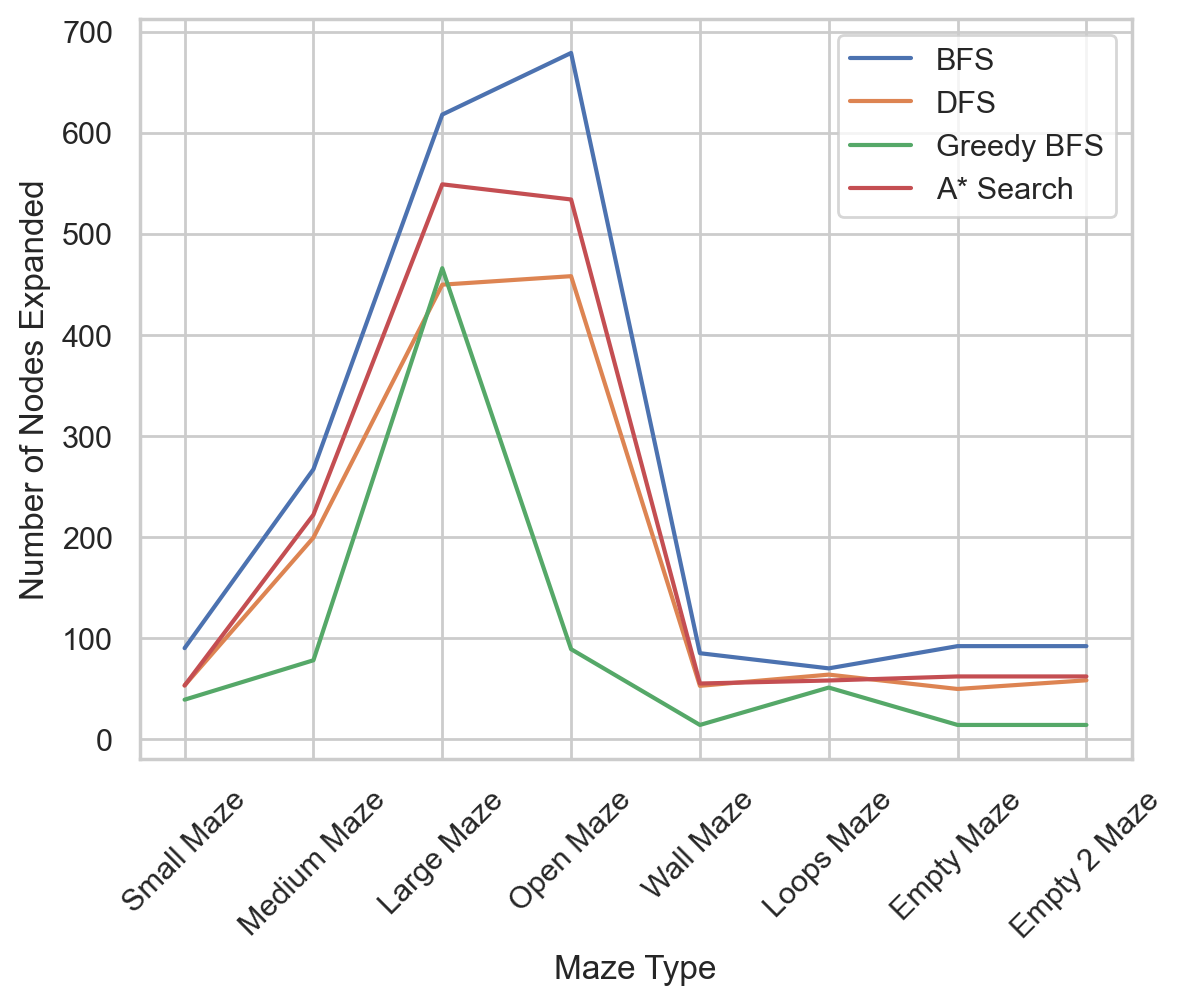

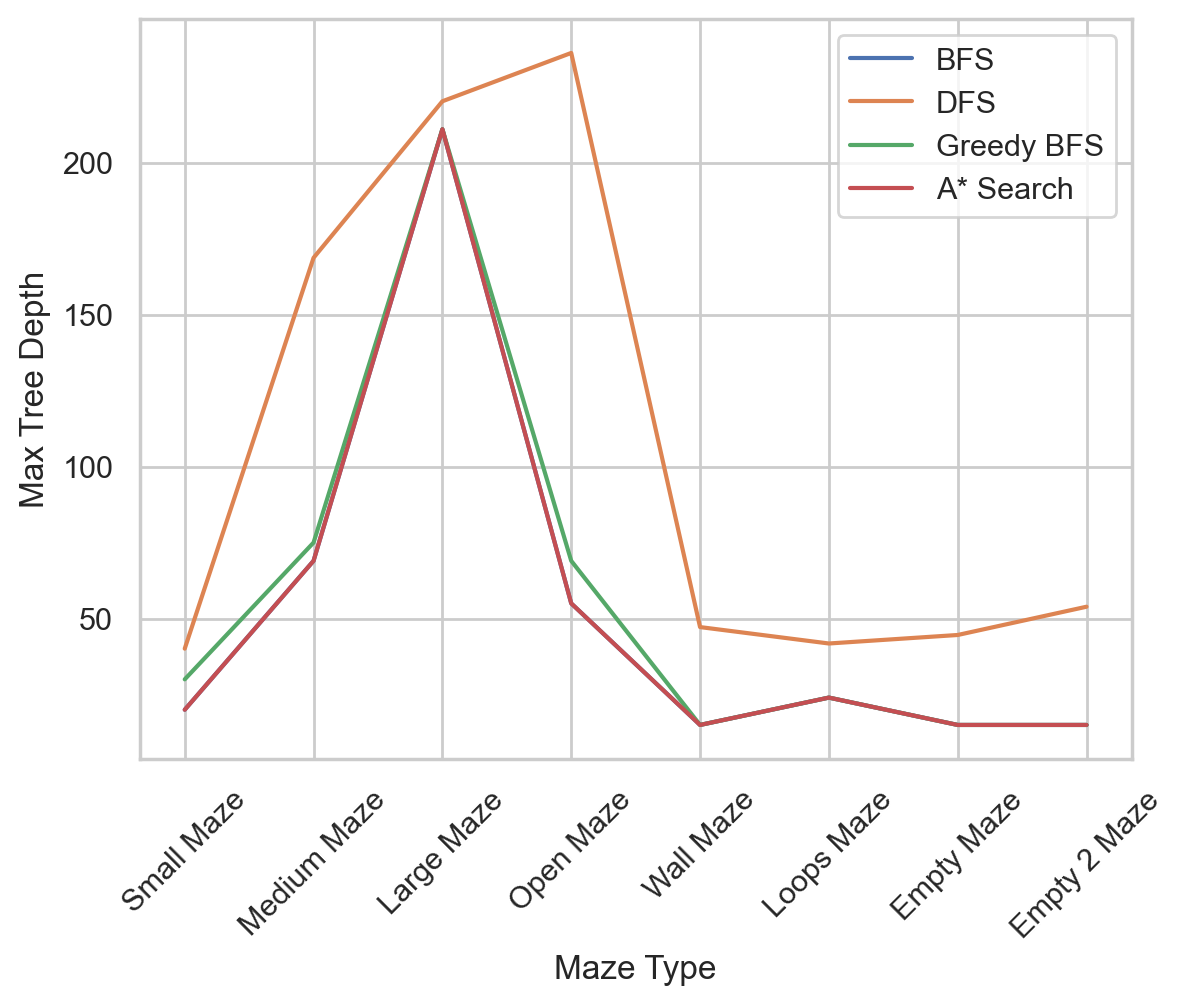

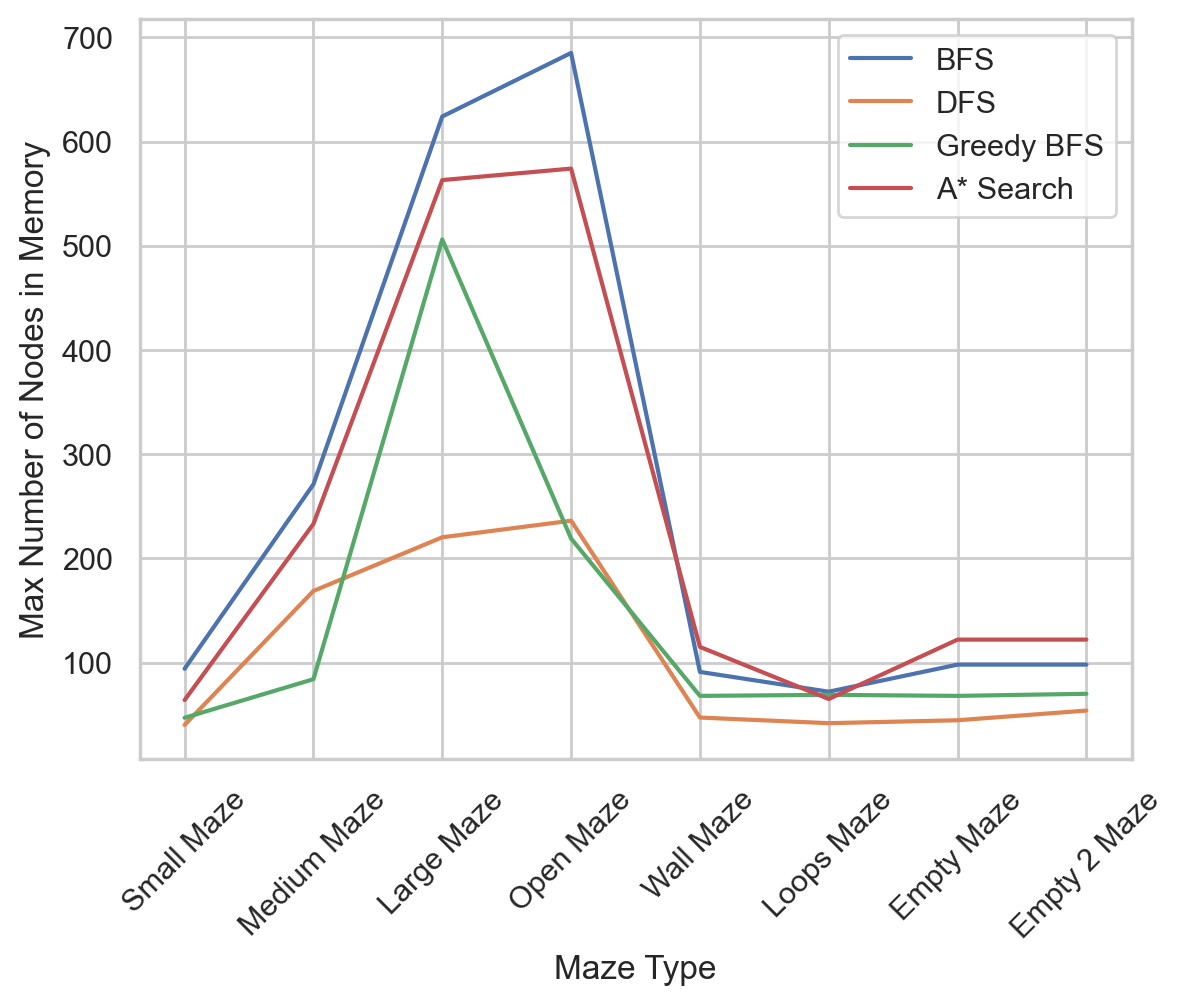

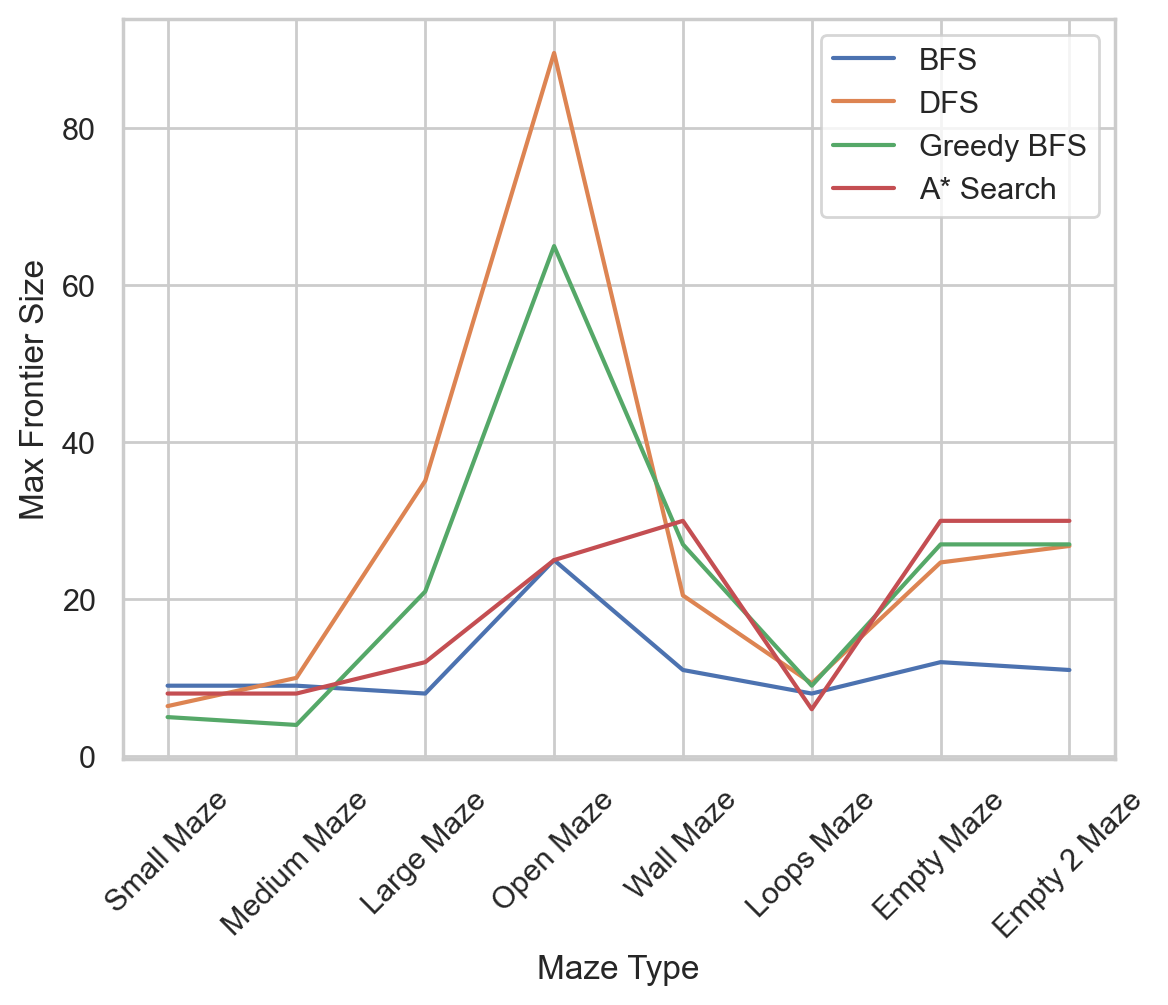

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid") # adds grid lines
x = range(8)

all_stats = [stats1, stats2, stats3, stats4, stats5, stats6, stats7, stats8]

breadth_stats = [
    [],
    [],
    [],
    [],
    []
]

depth_stats = [
    [],
    [],
    [],
    [],
    []
]

greedy_stats = [
    [],
    [],
    [],
    [],
    []
]

a_star_stats = [
    [],
    [],
    [],
    [],
    []
]

# putting the needed stats together so I can plot them
for stats in all_stats:
    counter = 0
    for stats_type in stats:
        if counter == 0: # breadth_stats
            breadth_stats[0].append(stats_type[0])
            breadth_stats[1].append(stats_type[1])
            breadth_stats[2].append(stats_type[2])
            breadth_stats[3].append(stats_type[3])
            breadth_stats[4].append(stats_type[4])
        elif counter == 1: # depth_stats
            depth_stats[0].append(stats_type[0])
            depth_stats[1].append(stats_type[1])
            depth_stats[2].append(stats_type[2])
            depth_stats[3].append(stats_type[3])
            depth_stats[4].append(stats_type[4])
        elif counter == 2: # greedy_stats
            greedy_stats[0].append(stats_type[0])
            greedy_stats[1].append(stats_type[1])
            greedy_stats[2].append(stats_type[2])
            greedy_stats[3].append(stats_type[3])
            greedy_stats[4].append(stats_type[4])
        else: # a_star_stats
            a_star_stats[0].append(stats_type[0])
            a_star_stats[1].append(stats_type[1])
            a_star_stats[2].append(stats_type[2])
            a_star_stats[3].append(stats_type[3])
            a_star_stats[4].append(stats_type[4])
        
        counter += 1
        
def plot_stats(stat_type, number):
    plt.plot(x, breadth_stats[number], label="BFS") 
    plt.plot(x, depth_stats[number], label="DFS") 
    plt.plot(x, greedy_stats[number], label="Greedy BFS")
    plt.plot(x, a_star_stats[number], label="A* Search")

    plt.xticks(x, ["Small Maze", "Medium Maze", "Large Maze", 
                   "Open Maze", "Wall Maze", "Loops Maze", 
                   "Empty Maze", "Empty 2 Maze"], rotation=45)

    plt.xlabel("Maze Type")
    plt.ylabel(stat_type)
    plt.legend()
    plt.show()

plot_stats("Path Cost", 0)
plot_stats("Number of Nodes Expanded", 1)
plot_stats("Max Tree Depth", 2)
plot_stats("Max Number of Nodes in Memory", 3)
plot_stats("Max Frontier Size", 4)

#### Analysis
As the above charts show, Depth First Search pretty much always has the highest path cost across all search algorithms. This seems logical, as the path Depth First Search takes is random, and in open spaces it may cover a lot of redundant space before it finds the goal (which makes its path to the goal much longer than the other algorithms).

Breadth First Search consistently had the highest number of nodes expanded, followed closely by A* Search. This makes sense, as these search algorithms generally search more of the maze so they can find the shortest path from the start to the goal.

Similiarly, BFS and A* Search were 1st and 2nd, respectively, for Max Number of Nodes in Memory across most mazes. This appears reasonable, as both of these searches explore a lot of nodes that they then store in memory. Conversely, Depth First Search often had the fewest Max Number of Nodes in Memory, which is also reasonable, as it doesn't use a <code>reached</code> data structure and only keeps the nodes of the current path in its memory. 

Depth First Search consistently had the highest Max Tree Depth and Max Frontier Size, which seems logical, as DFS will often create long paths as it searches for the goal, which both increases the search tree's depth and increases the frontier size as it finds new neighbor nodes to explore.

Discuss the most important lessons you have learned from implementing the different search strategies.

I have learned several important lessons after implementing these different search algorithms. For starters, if you need to find the optimal solution for a search problem (such as the shortest path from the start to the goal), then Breadth First Search or A* Search should be used. However, guaranteeing the optimal solution also requires more memory usage and will generally require more computational time.

If someone simply wants a quick solution to a search problem and doesn't care about the optimal solution, then Depth First Search could possibly work well (as in mazes with few paths, it generally found solutions faster than the other algorithms); however, Depth First Search generally finds highly unoptimized solutions, and it can take a long time if there are big open spaces that it has to navigate through.

Thus, if I ever required a search algorithm in the future, I would utilize A* Search. It's ability to find the optimal solution, while being computationally faster and taking less time than Breadth First Search, makes it the best search algorithm.

## Graduate student advanced task: IDS and Multiple goals [10 Points]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus Points].

Create a few mazes with multiple goals by adding one or two more goals to the medium size maze.
Solve the maze with your implementations for DFS, BFS, and implement in addition IDS (iterative deepening search using DFS).

Run experiments to show which implementations find the optimal solution and which do not. Discuss why that is the case.

In [21]:
# Iterative Deepening Search Implementation
def IDS(maze, verbose=False):
    depth = 0
    while depth < float('inf'):
        result = DFS(maze, depth, verbose)
        if result != depth:
            return result
        depth += 1

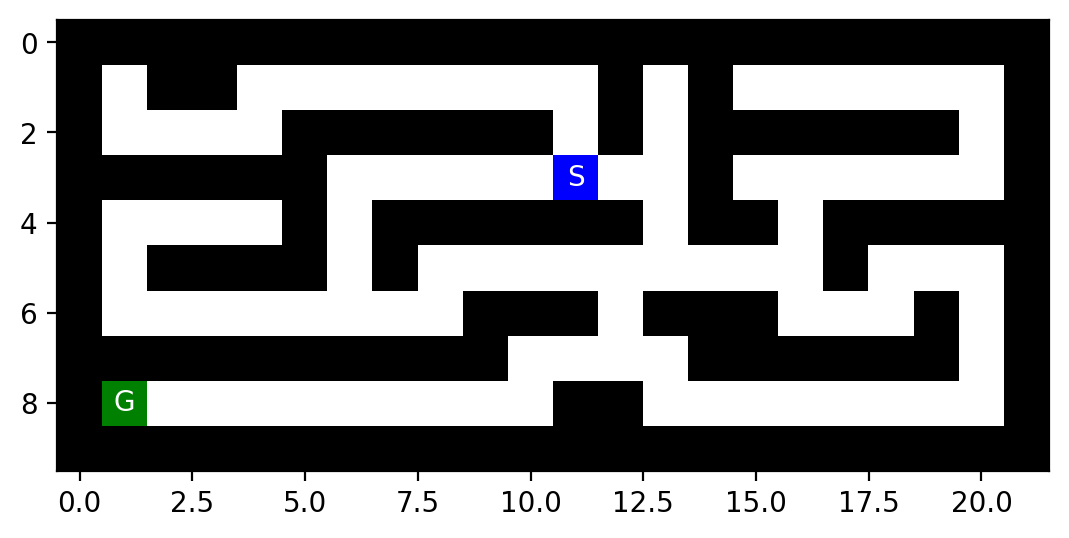

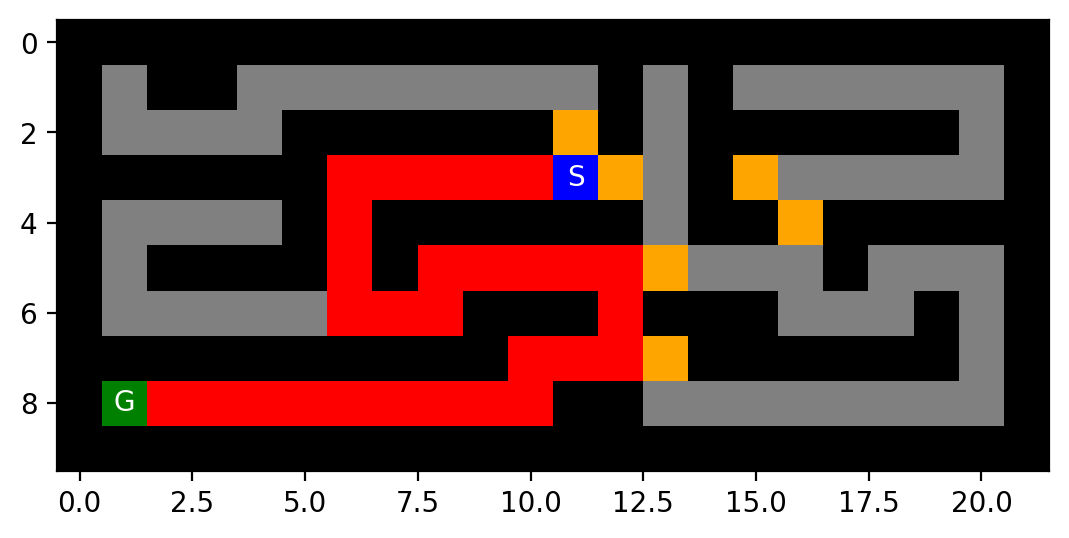

Path:
Node - pos = (3, 11); action = None; cost = 0
Node - pos = (3, 10); action = West; cost = 1
Node - pos = (3, 9); action = West; cost = 2
Node - pos = (3, 8); action = West; cost = 3
Node - pos = (3, 7); action = West; cost = 4
Node - pos = (3, 6); action = West; cost = 5
Node - pos = (4, 6); action = South; cost = 6
Node - pos = (5, 6); action = South; cost = 7
Node - pos = (6, 6); action = South; cost = 8
Node - pos = (6, 7); action = East; cost = 9
Node - pos = (6, 8); action = East; cost = 10
Node - pos = (5, 8); action = North; cost = 11
Node - pos = (5, 9); action = East; cost = 12
Node - pos = (5, 10); action = East; cost = 13
Node - pos = (5, 11); action = East; cost = 14
Node - pos = (5, 12); action = East; cost = 15
Node - pos = (6, 12); action = South; cost = 16
Node - pos = (7, 12); action = South; cost = 17
Node - pos = (7, 11); action = West; cost = 18
Node - pos = (7, 10); action = West; cost = 19
Node - pos = (8, 10); action = South; cost = 20
Node - pos = (8, 9); 

In [22]:
with open("small_maze.txt", "r") as f:
    maze_str = f.read()

maze = mh.parse_maze(maze_str)

mh.show_maze(maze)

goal = IDS(maze)

draw_final_path(maze, goal)
mh.show_maze(maze)

print('Path:')
for node in goal.get_path_from_root():
    print(node)

My mazes with multiple goals look like:

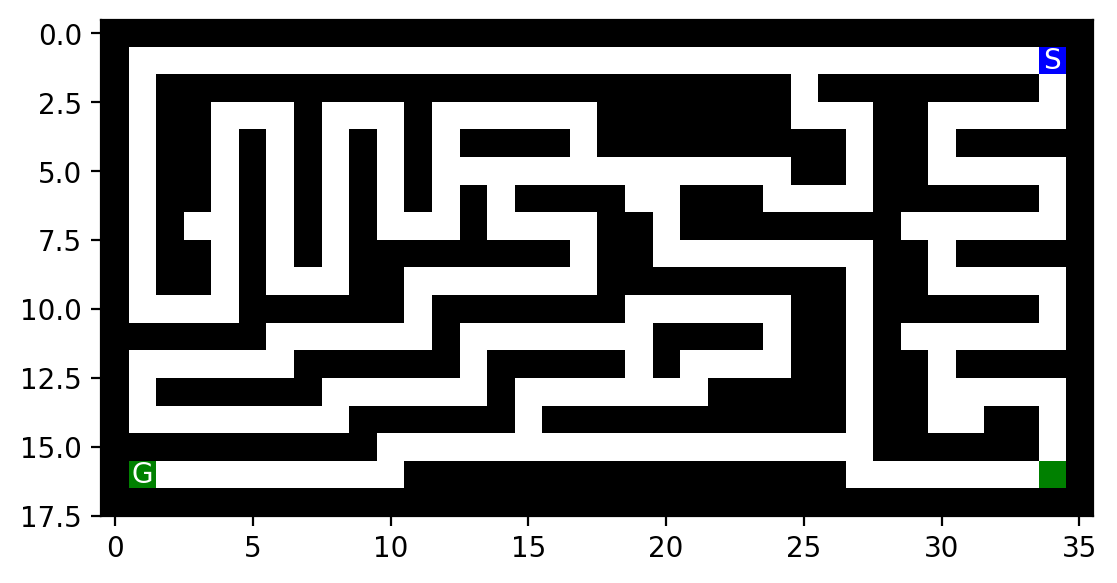

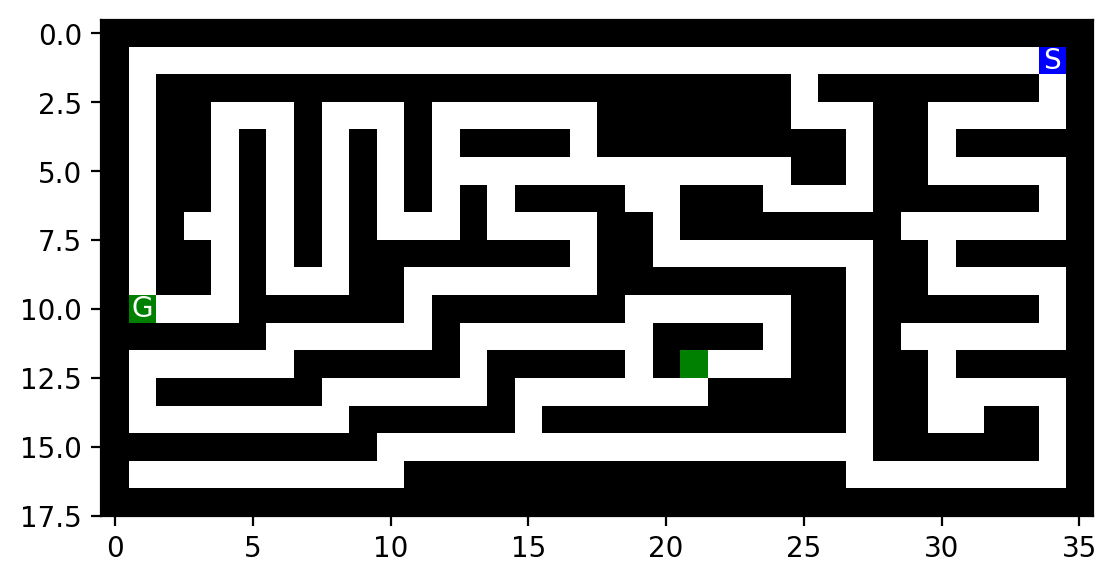

In [23]:
with open("medium_2_maze.txt", "r") as f:
    maze_str = f.read()

maze_1 = mh.parse_maze(maze_str)

mh.show_maze(maze_1)

with open("medium_3_maze.txt", "r") as f:
    maze_str = f.read()

maze_2 = mh.parse_maze(maze_str)

mh.show_maze(maze_2)

BFS:


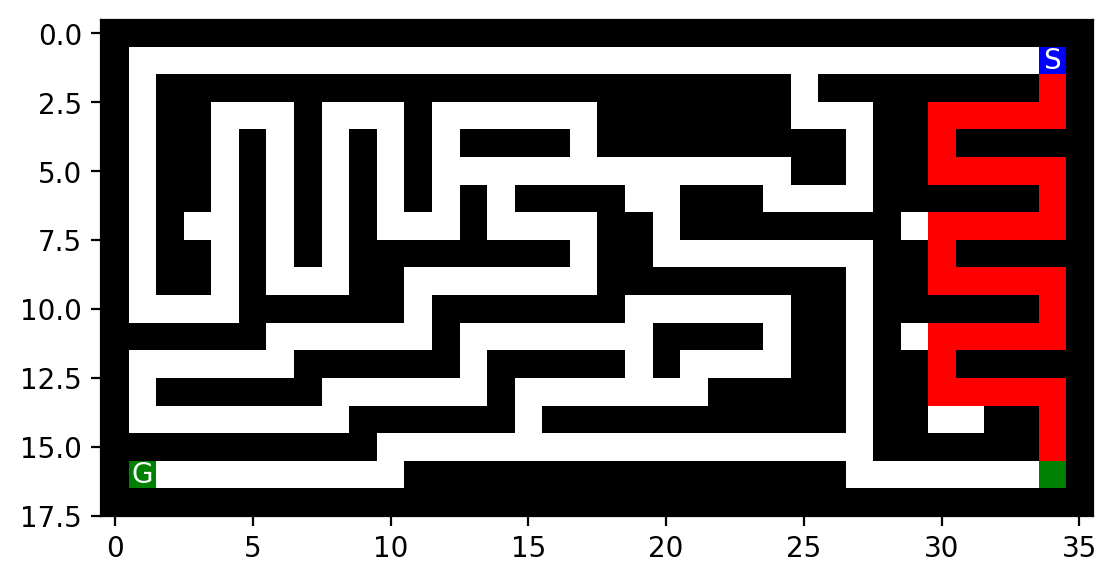

DFS:


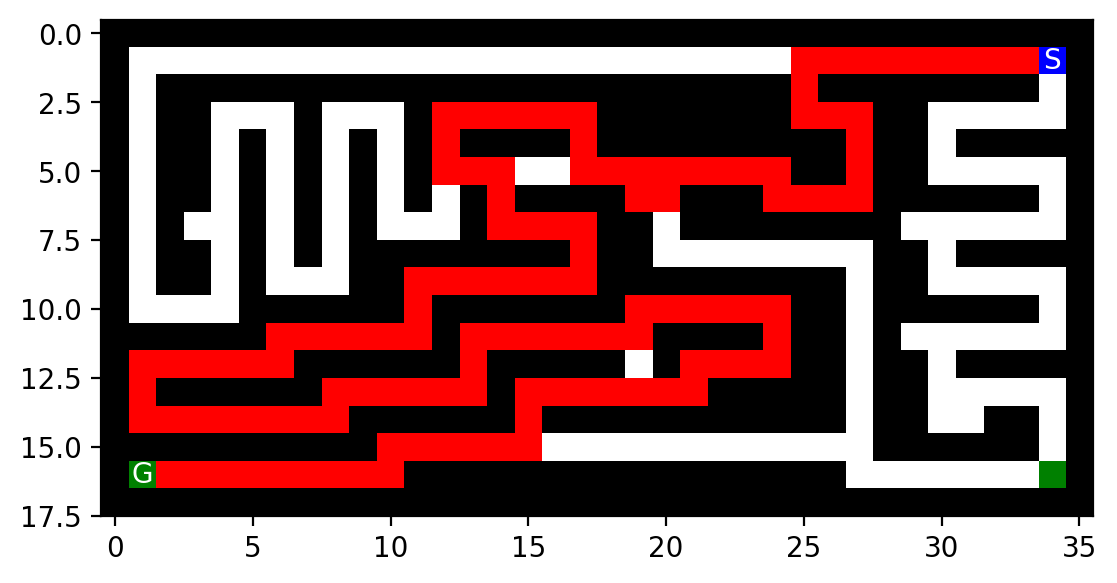

IDS:


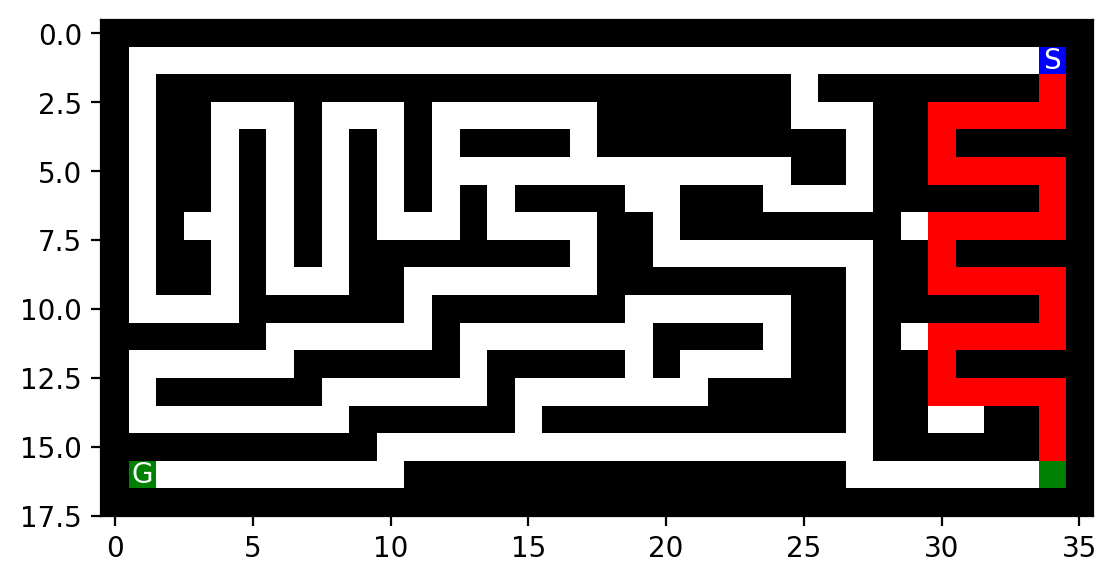

In [24]:
# medium_2_maze
BFS_maze_1 = deepcopy(maze_1)
DFS_maze_1 = deepcopy(maze_1)
IDS_maze_1 = deepcopy(maze_1)

BFS_goal_1 = BFS(BFS_maze_1)
DFS_goal_1 = DFS(DFS_maze_1)
IDS_goal_1 = IDS(IDS_maze_1)

BFS_maze_1 = deepcopy(maze_1)
DFS_maze_1 = deepcopy(maze_1)
IDS_maze_1 = deepcopy(maze_1)

draw_final_path(BFS_maze_1, BFS_goal_1)
print('BFS:')
mh.show_maze(BFS_maze_1)
draw_final_path(DFS_maze_1, DFS_goal_1)
print('DFS:')
mh.show_maze(DFS_maze_1)
draw_final_path(IDS_maze_1, IDS_goal_1)
print('IDS:')
mh.show_maze(IDS_maze_1)

BFS:


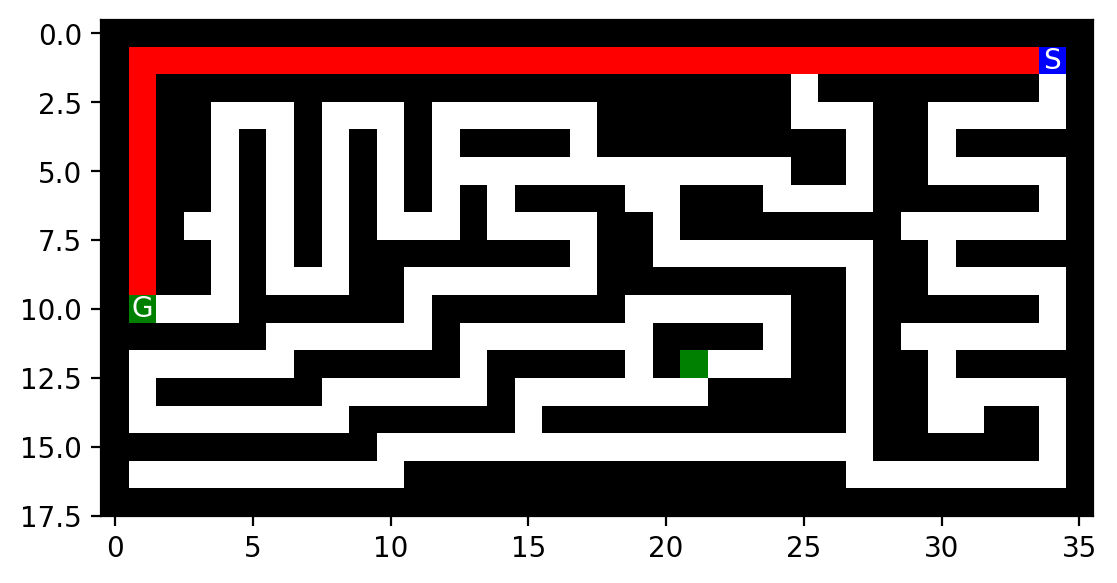

DFS:


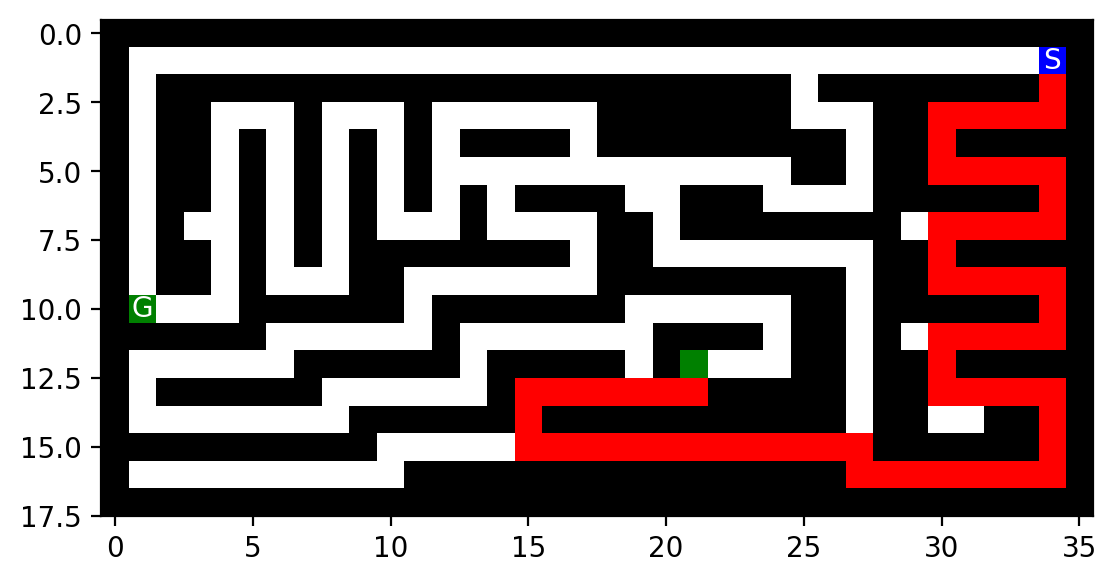

IDS:


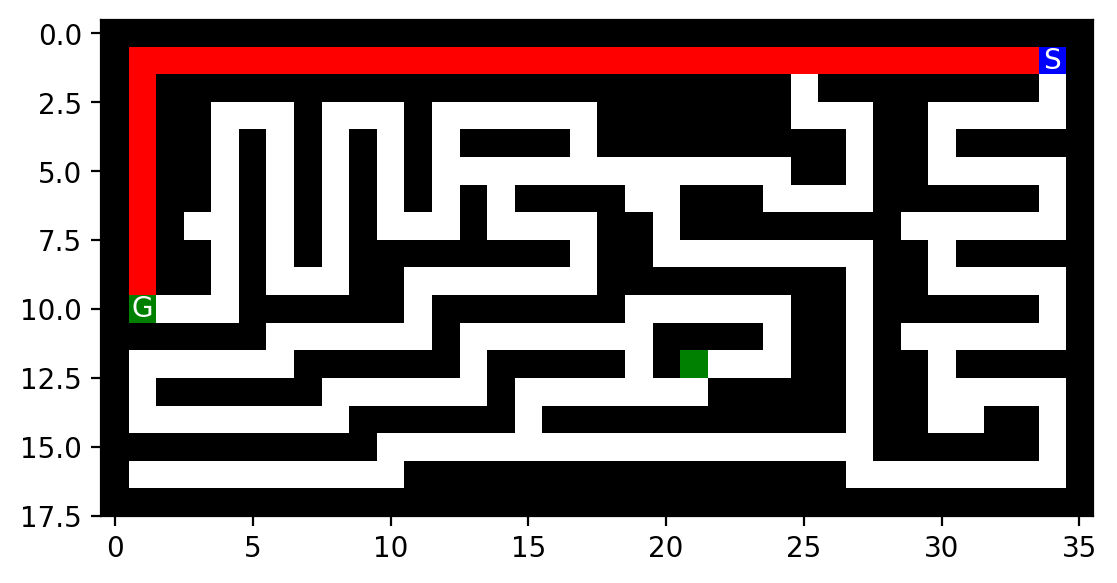

In [25]:
# medium_3_maze
BFS_maze_2 = deepcopy(maze_2)
DFS_maze_2 = deepcopy(maze_2)
IDS_maze_2 = deepcopy(maze_2)

BFS_goal_2 = BFS(BFS_maze_2)
DFS_goal_2 = DFS(DFS_maze_2)
IDS_goal_2 = IDS(IDS_maze_2)

BFS_maze_2 = deepcopy(maze_2)
DFS_maze_2 = deepcopy(maze_2)
IDS_maze_2 = deepcopy(maze_2)

draw_final_path(BFS_maze_2, BFS_goal_2)
print('BFS:')
mh.show_maze(BFS_maze_2)
draw_final_path(DFS_maze_2, DFS_goal_2)
print('DFS:')
mh.show_maze(DFS_maze_2)
draw_final_path(IDS_maze_2, IDS_goal_2)
print('IDS:')
mh.show_maze(IDS_maze_2)

#### Analysis
As the above results show, both Breath First Search and Depth First Search find the optimal solution for the mazes with multiple goals, while Depth First Search does not (I confirmed this by running the above code blocks multiple times). This makes sense, as Breadth First Search is optimal, meaning it will always find the shortest path from the start tile to a goal tile. Meanwhile, Depth First Search is not optimal, so most of the time it will not find the shortest path. However, Iterative Deepening Search does find the optimal solution; since the path cost of moving between tiles is always 1, Iterative Deepening Search is an optimal search algorithm, and it will always find the shortest path from the tile to the goal.

## More advanced tasks to think about

Instead of defining each square as a state, use only intersections as states. Now the storage requirement is reduced, but the path length between two intersections can be different. If we use total path length measured as the number of squares as path cost, how can we make sure that BFS and iterative deepening search is optimal? Change the code to do so.

In [ ]:
# Your code/answer goes here

Modify your A* search to add weights (see text book) and explore how different weights influence the result.

In [ ]:
# Your code/answer goes here

What happens if the agent does not know the layout of the maze in advance (i.e., faces an unkown, only partially observable environment)? How does the environment look then (PEAS description)? How would you implement a rational agent to solve the maze? What if the agent still has a GPS device to tell the distance to the goal?

In [ ]:
# Your code/answer goes here

# Search Algorithms with Stats
I've put the code for finding the stats for each algorithm below so they're not in the way. They're exactly the same as my original algorithms, except they record and return the stats needed for the analysis in Task 4.

In [19]:
# Breadth First Search Implementation
def BFS_stats(maze, verbose=False):
    start = mh.find_pos(maze, what="S")
    goal = mh.find_pos(maze, what="G")
    
    node = Node(start, None, None, 0) # starting node
    
    if node.pos == goal: # if starting node is also goal node
        return node
    
    frontier = [node] # a FIFO queue
    reached = [node.pos]
    
    path_cost = 0
    num_nodes_expanded = 0
    max_tree_depth = 0
    max_nodes_in_memory = 0
    max_frontier_size = 1
    
    while len(frontier) > 0:
        if len(frontier) > max_frontier_size:
            max_frontier_size = len(frontier)
        
        node = frontier.pop(0)
        num_nodes_expanded += 1
        
        if maze[node.pos] != 'S':
            maze[node.pos] = 'P'
                    
        row, col = node.pos
        
        if row - 1 > 0: # if north is inside of maze
            north = (row - 1, col)

            north_node = Node(north, node, 'North', node.cost + 1)

            if maze[north] == 'G': # if north child is goal
                if verbose:
                    mh.show_maze(maze)
                    draw_final_path(maze, north_node)
                    mh.show_maze(maze)
                
                path_cost = len(north_node.get_path_from_root())
                max_tree_depth = path_cost
                max_nodes_in_memory = len(reached) + len(frontier)
                
                return north_node, path_cost, num_nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size
            elif maze[north] != 'X' and north not in reached:
                reached.append(north)
                frontier.append(north_node)
                maze[north] = 'F'
            
        if col + 1 < len(maze[0]): # if east is inside of maze
            east = (row, col + 1)
            
            east_node = Node(east, node, 'East', node.cost + 1)

            if maze[east] == 'G': # if east child is goal
                if verbose:
                    mh.show_maze(maze)
                    draw_final_path(maze, east_node)
                    mh.show_maze(maze)
                
                path_cost = len(east_node.get_path_from_root())
                max_tree_depth = path_cost
                max_nodes_in_memory = len(reached) + len(frontier)
                
                return east_node, path_cost, num_nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size
            elif maze[east] != 'X' and east not in reached:
                reached.append(east)
                frontier.append(east_node)
                maze[east] = 'F'
            
        if row + 1 < len(maze[0]): # if south is inside of maze
            south = (row + 1, col)
            
            south_node = Node(south, node, 'South', node.cost + 1)
            
            if maze[south] == 'G': # if south child is goal
                if verbose:
                    mh.show_maze(maze)
                    draw_final_path(maze, south_node)
                    mh.show_maze(maze)
                
                path_cost = len(south_node.get_path_from_root())
                max_tree_depth = path_cost
                max_nodes_in_memory = len(reached) + len(frontier)
                
                return south_node, path_cost, num_nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size
            elif maze[south] != 'X' and south not in reached:
                reached.append(south)
                frontier.append(south_node)
                maze[south] = 'F'
                        
        if col - 1 > 0: # if west is inside of maze
            west = (row, col - 1)
            
            west_node = Node(west, node, 'West', node.cost + 1)
            
            if maze[west] == 'G': # if west child is goal
                if verbose:
                    mh.show_maze(maze)
                    draw_final_path(maze, west_node)
                    mh.show_maze(maze)
                
                path_cost = len(west_node.get_path_from_root())
                max_tree_depth = path_cost
                max_nodes_in_memory = len(reached) + len(frontier)
                
                return west_node, path_cost, num_nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size
            elif maze[west] != 'X' and west not in reached:
                reached.append(west)
                frontier.append(west_node)
                maze[west] = 'F'
          
        if verbose:
            mh.show_maze(maze)
        
        if maze[node.pos] != 'S':
            maze[node.pos] = '.'
        
                
    return None

import random

# Depth First Search Implementation
'''
the depth variable is only used for Iterative Deepening Search,
otherwise it is defaulted to infinity
'''
def DFS_stats(maze, depth=float('inf'), verbose=False):
    start = mh.find_pos(maze, what="S")
    goal = mh.find_pos(maze, what="G")
    
    node = Node(start, None, None, 0) # starting node
        
    frontier = [node] # a LIFO stack
    
    counter = 0
    
    path_cost = 0
    num_nodes_expanded = 0
    max_tree_depth = 0
    max_nodes_in_memory = 0
    max_frontier_size = 1
    
    # counter and depth are only relevant when Iterative Deepening Search defines a depth
    while len(frontier) > 0 and counter < depth:
        if len(frontier) > max_frontier_size:
            max_frontier_size = len(frontier)
        
        counter += 1
        
        node = frontier.pop(-1) # takes the top node off the stack
        
        if len(node.get_path_from_root()) > max_tree_depth:
            max_tree_depth = len(node.get_path_from_root())
            max_nodes_in_memory = len(node.get_path_from_root())
        
        if node.pos == goal: # if the current node is the goal
            if verbose:
                draw_final_path(maze, node)
                mh.show_maze(maze)
                
            path_cost = len(node.get_path_from_root())
            
            return node, path_cost, num_nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size 
        else:
            num_nodes_expanded += 1
        
        if maze[node.pos] != 'S':
            maze[node.pos] = 'P'

        row, col = node.pos
        
        # the possible actions (north, south, east, west) that can be navigated to from the current tile
        possible_actions = []

        if row - 1 > 0: # if north is inside of maze
            north = (row - 1, col)
            
            # if north isn't a wall and isn't already in the path
            if maze[north] != 'X' and cycle_not_found(node, north):
                # remove any earlier instances of north on the frontier 
                frontier = [node for node in frontier if node.pos != north]
                
                north_node = Node(north, node, 'North', node.cost + 1)
                possible_actions.append(north_node)
                if maze[north] != 'G':
                    maze[north] = 'F'

        if col + 1 < len(maze[0]): # if east is inside of maze
            east = (row, col + 1)
            
            # if east isn't a wall and isn't already in the path
            if maze[east] != 'X' and cycle_not_found(node, east):
                # remove any earlier instances of east on the frontier
                frontier = [node for node in frontier if node.pos != east]
                
                east_node = Node(east, node, 'East', node.cost + 1)
                possible_actions.append(east_node)
                if maze[east] != 'G':
                    maze[east] = 'F'

        if row + 1 < len(maze[0]): # if south is inside of maze
            south = (row + 1, col)
            
            # if south isn't a wall and isn't already in the path
            if maze[south] != 'X' and cycle_not_found(node, south):
                # remove any earlier instances of south on the frontier
                frontier = [node for node in frontier if node.pos != south]
                
                south_node = Node(south, node, 'South', node.cost + 1)
                possible_actions.append(south_node)
                if maze[south] != 'G':
                    maze[south] = 'F'

        if col - 1 > 0: # if west is inside of maze
            west = (row, col - 1)
            
            # if west isn't a wall and isn't already in the path
            if maze[west] != 'X' and cycle_not_found(node, west):
                # remove any earlier instances of west on the frontier
                frontier = [node for node in frontier if node.pos != west]
                
                west_node = Node(west, node, 'West', node.cost + 1)
                possible_actions.append(west_node)
                if maze[west] != 'G':
                    maze[west] = 'F'

        # add the possible actions to the frontier in a random order
        random.shuffle(possible_actions)
        frontier.extend(possible_actions)
                    
        if verbose:
            mh.show_maze(maze)
        
        if maze[node.pos] != 'S':
            maze[node.pos] = '.'
            
    if counter == depth: # if the depth limit is reached
        return depth
    else: # if there is no solution
        return None

import bisect

# Greedy Best First Search Implementation
'''
the cost for each node is equal to the manhattan distance
from the node to the goal

bisect.insort() is used to make the frontier a priority queue,
as it inserts elements in sorted order by shortest manhattan distance
'''
def greedy_BFS_stats(maze, verbose=False):
    start = mh.find_pos(maze, what="S")
    goal = mh.find_pos(maze, what="G")
    
    # start node
    node = Node(start, None, None, get_manhattan_distance(start, goal))
    
    if node.pos == goal:
        return node
    
    frontier = [node] # priority queue
    reached = {node.pos: node} # lookup table
    
    path_cost = 0
    num_nodes_expanded = 0
    max_tree_depth = 0
    max_nodes_in_memory = 0
    max_frontier_size = 1
    
    while len(frontier) > 0:
        if len(frontier) > max_frontier_size:
            max_frontier_size = len(frontier)
        
        node = frontier.pop(0)
        num_nodes_expanded += 1
        
        if len(node.get_path_from_root()) > max_tree_depth:
            max_tree_depth = len(node.get_path_from_root())
        
        if maze[node.pos] != 'S':
            maze[node.pos] = 'P'
                    
        row, col = node.pos
        
        if row - 1 > 0: # if north is inside of maze
            north = (row - 1, col)

            north_node = Node(north, node, 'North', get_manhattan_distance(north, goal))

            if maze[north] == 'G': # if north child is goal
                if verbose:
                    mh.show_maze(maze)
                    draw_final_path(maze, north_node)
                    mh.show_maze(maze)
                
                path_cost = len(north_node.get_path_from_root())
                if len(north_node.get_path_from_root()) > max_tree_depth:
                    max_tree_depth = path_cost
                max_nodes_in_memory = len(reached) + len(frontier)
                
                return north_node, path_cost, num_nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size
            elif maze[north] != 'X' and north not in reached:
                bisect.insort(frontier, north_node, key=lambda node: node.cost)
                reached[north] = north_node
                maze[north] = 'F'
            
        if col + 1 < len(maze[0]): # if east is inside of maze
            east = (row, col + 1)
            
            east_node = Node(east, node, 'East', get_manhattan_distance(east, goal))

            if maze[east] == 'G': # if east child is goal
                if verbose:
                    mh.show_maze(maze)
                    draw_final_path(maze, east_node)
                    mh.show_maze(maze)
                
                path_cost = len(east_node.get_path_from_root())
                if len(east_node.get_path_from_root()) > max_tree_depth:
                    max_tree_depth = path_cost
                max_nodes_in_memory = len(reached) + len(frontier)
                
                return east_node, path_cost, num_nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size
            elif maze[east] != 'X' and east not in reached:
                bisect.insort(frontier, east_node, key=lambda node: node.cost)
                reached[east] = east_node
                maze[east] = 'F'
            
        if row + 1 < len(maze[0]): # if south is inside of maze
            south = (row + 1, col)
            
            south_node = Node(south, node, 'South', get_manhattan_distance(south, goal))
            
            if maze[south] == 'G': # if south child is goal
                if verbose:
                    mh.show_maze(maze)
                    draw_final_path(maze, south_node)
                    mh.show_maze(maze)
                
                path_cost = len(south_node.get_path_from_root())
                if len(south_node.get_path_from_root()) > max_tree_depth:
                    max_tree_depth = path_cost
                max_nodes_in_memory = len(reached) + len(frontier)
                
                return south_node, path_cost, num_nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size
            elif maze[south] != 'X' and south not in reached:
                bisect.insort(frontier, south_node, key=lambda node: node.cost)
                reached[south] = south_node
                maze[south] = 'F'
                        
        if col - 1 > 0: # if west is inside of maze
            west = (row, col - 1)
            
            west_node = Node(west, node, 'West', get_manhattan_distance(west, goal))
            
            if maze[west] == 'G': # if west child is goal
                if verbose:
                    mh.show_maze(maze)
                    draw_final_path(maze, west_node)
                    mh.show_maze(maze)
                
                path_cost = len(west_node.get_path_from_root())
                if len(west_node.get_path_from_root()) > max_tree_depth:
                    max_tree_depth = path_cost
                max_nodes_in_memory = len(reached) + len(frontier)
                
                return west_node, path_cost, num_nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size
            elif maze[west] != 'X' and west not in reached:
                bisect.insort(frontier, west_node, key=lambda node: node.cost)
                reached[west] = west_node
                maze[west] = 'F'
          
        if verbose:
            mh.show_maze(maze)
        
        if maze[node.pos] != 'S':
            maze[node.pos] = '.'
        
                
    return None

# A Star Search Implementation
'''
the cost for each node is equal to the manhattan distance
from the node to the goal AND the path length from the node to the start

bisect.insort() is used to make the frontier a priority queue,
as it inserts elements in sorted order by cheapest cost
'''
def a_star_search_stats(maze, verbose=False):
    start = mh.find_pos(maze, what="S")
    goal = mh.find_pos(maze, what="G")
    
    # start node
    node = Node(start, None, None, get_manhattan_distance(start, goal))
    
    if node.pos == goal:
        return node
    
    frontier = [node] # priority queue
    reached = {node.pos: node} # lookup table
    
    path_cost = 0
    num_nodes_expanded = 0
    max_tree_depth = 0
    max_nodes_in_memory = 0
    max_frontier_size = 1
    
    while len(frontier) > 0:
        if len(frontier) > max_frontier_size:
            max_frontier_size = len(frontier)
        
        node = frontier.pop(0)
        num_nodes_expanded += 1
        
        if maze[node.pos] != 'S':
            maze[node.pos] = 'P'
                    
        row, col = node.pos
        
        if row - 1 > 0: # if north is inside of maze
            north = (row - 1, col)

            north_node = Node(north, node, 'North', get_manhattan_distance(north, goal) + len(node.get_path_from_root()) + 1)

            if maze[north] == 'G':
                if verbose:
                    mh.show_maze(maze)
                    draw_final_path(maze, north_node)
                    mh.show_maze(maze)
                
                path_cost = len(north_node.get_path_from_root())
                max_tree_depth = path_cost
                max_nodes_in_memory = len(reached) + len(frontier)
                
                return north_node, path_cost, num_nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size
            elif maze[north] != 'X' and (north not in reached or north_node.cost < reached[north].cost):
                bisect.insort(frontier, north_node, key=lambda node: node.cost)
                reached[north] = north_node
                maze[north] = 'F'
            
        if col + 1 < len(maze[0]): # if east is inside of maze
            east = (row, col + 1)
            
            east_node = Node(east, node, 'East', get_manhattan_distance(east, goal) + len(node.get_path_from_root()) + 1)

            if maze[east] == 'G':
                if verbose:
                    mh.show_maze(maze)
                    draw_final_path(maze, east_node)
                    mh.show_maze(maze)
                
                path_cost = len(east_node.get_path_from_root())
                max_tree_depth = path_cost
                max_nodes_in_memory = len(reached) + len(frontier)
                
                return east_node, path_cost, num_nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size
            elif maze[east] != 'X' and (east not in reached or east_node.cost < reached[east].cost):
                bisect.insort(frontier, east_node, key=lambda node: node.cost)
                reached[east] = east_node
                maze[east] = 'F'
            
        if row + 1 < len(maze[0]): # if south is inside of maze
            south = (row + 1, col)
            
            south_node = Node(south, node, 'South', get_manhattan_distance(south, goal) + len(node.get_path_from_root()) + 1)
            
            if maze[south] == 'G':
                if verbose:
                    mh.show_maze(maze)
                    draw_final_path(maze, south_node)
                    mh.show_maze(maze)
                
                path_cost = len(south_node.get_path_from_root())
                max_tree_depth = path_cost
                max_nodes_in_memory = len(reached) + len(frontier)
                
                return south_node, path_cost, num_nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size
            elif maze[south] != 'X' and (south not in reached or south_node.cost < reached[south].cost):
                bisect.insort(frontier, south_node, key=lambda node: node.cost)
                reached[south] = south_node
                maze[south] = 'F'
                        
        if col - 1 > 0: # if west is inside of maze
            west = (row, col - 1)
            
            west_node = Node(west, node, 'West', get_manhattan_distance(west, goal) + len(node.get_path_from_root()) + 1)
            
            if maze[west] == 'G':
                if verbose:
                    mh.show_maze(maze)
                    draw_final_path(maze, west_node)
                    mh.show_maze(maze)
                
                path_cost = len(west_node.get_path_from_root())
                max_tree_depth = path_cost
                max_nodes_in_memory = len(reached) + len(frontier)
                
                return west_node, path_cost, num_nodes_expanded, max_tree_depth, max_nodes_in_memory, max_frontier_size
            elif maze[west] != 'X' and (west not in reached or west_node.cost < reached[west].cost):
                bisect.insort(frontier, west_node, key=lambda node: node.cost)
                reached[west] = west_node
                maze[west] = 'F'
          
        if verbose:
            mh.show_maze(maze)
        
        if maze[node.pos] != 'S':
            maze[node.pos] = '.'
        
                
    return None